## <center>FORECASTING REGION-WISE ELECTRICITY CONSUMPTION</center>

In [1]:
#importing necessary libraries
import numpy as np                                              
import pandas as pd                                             
import matplotlib.pyplot as plt                                 
import seaborn as sns                                           
sns.set()

#importing necessary libraries for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose         
from statsmodels.tsa.stattools import acf,pacf,adfuller         
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA                   
from statsmodels.tsa.statespace.sarimax import SARIMAX          
import statsmodels.api as sm

#to filter out warnings
import warnings                                                  
warnings.simplefilter(action='ignore')

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/Harshita/Desktop/Datasets/Power consumption - statewise.csv',parse_dates=['Unnamed: 0'])
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-02-01,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-03-01,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-04-01,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-05-01,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-06-01,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [3]:
#renaming the Date column
df.rename(columns={'Unnamed: 0':'Date'},inplace=True)

In [4]:
#Setting Date as Index 
df.set_index('Date',inplace=True)

### Categorising the data into Five Regions

In [5]:
df['North Region'] = df['Punjab']+ df['Haryana']+ df['Rajasthan']+ df['Delhi']+df['UP']+df['Uttarakhand']+df['HP']+df['J&K']+df['Chandigarh']
df['West Region'] = df['Chhattisgarh']+df['Gujarat']+df['MP']+df['Maharashtra']+df['Goa']+df['DNH']
df['South Region'] = df['Andhra Pradesh']+df['Telangana']+df['Karnataka']+df['Kerala']+df['Tamil Nadu']+df['Pondy']
df['East Region'] = df['Bihar']+df['Jharkhand']+ df['Odisha']+df['West Bengal']+df['Sikkim']
df['Northeastern Region'] =df['Arunachal Pradesh']+df['Assam']+df['Manipur']+df['Meghalaya']+df['Mizoram']+df['Nagaland']+df['Tripura']

## Forecasting Electricity consumption in North Region

In [6]:
NR = df[['North Region']]
NR.head()

,North Region
Date,
2019-02-01,1012.2
2019-03-01,1021.3
2019-04-01,1017.2
2019-05-01,991.0
2019-06-01,985.5


In [7]:
# Checking the null values
NR.isnull().sum()

North Region    0
dtype: int64

### Data Distribution & Resampling

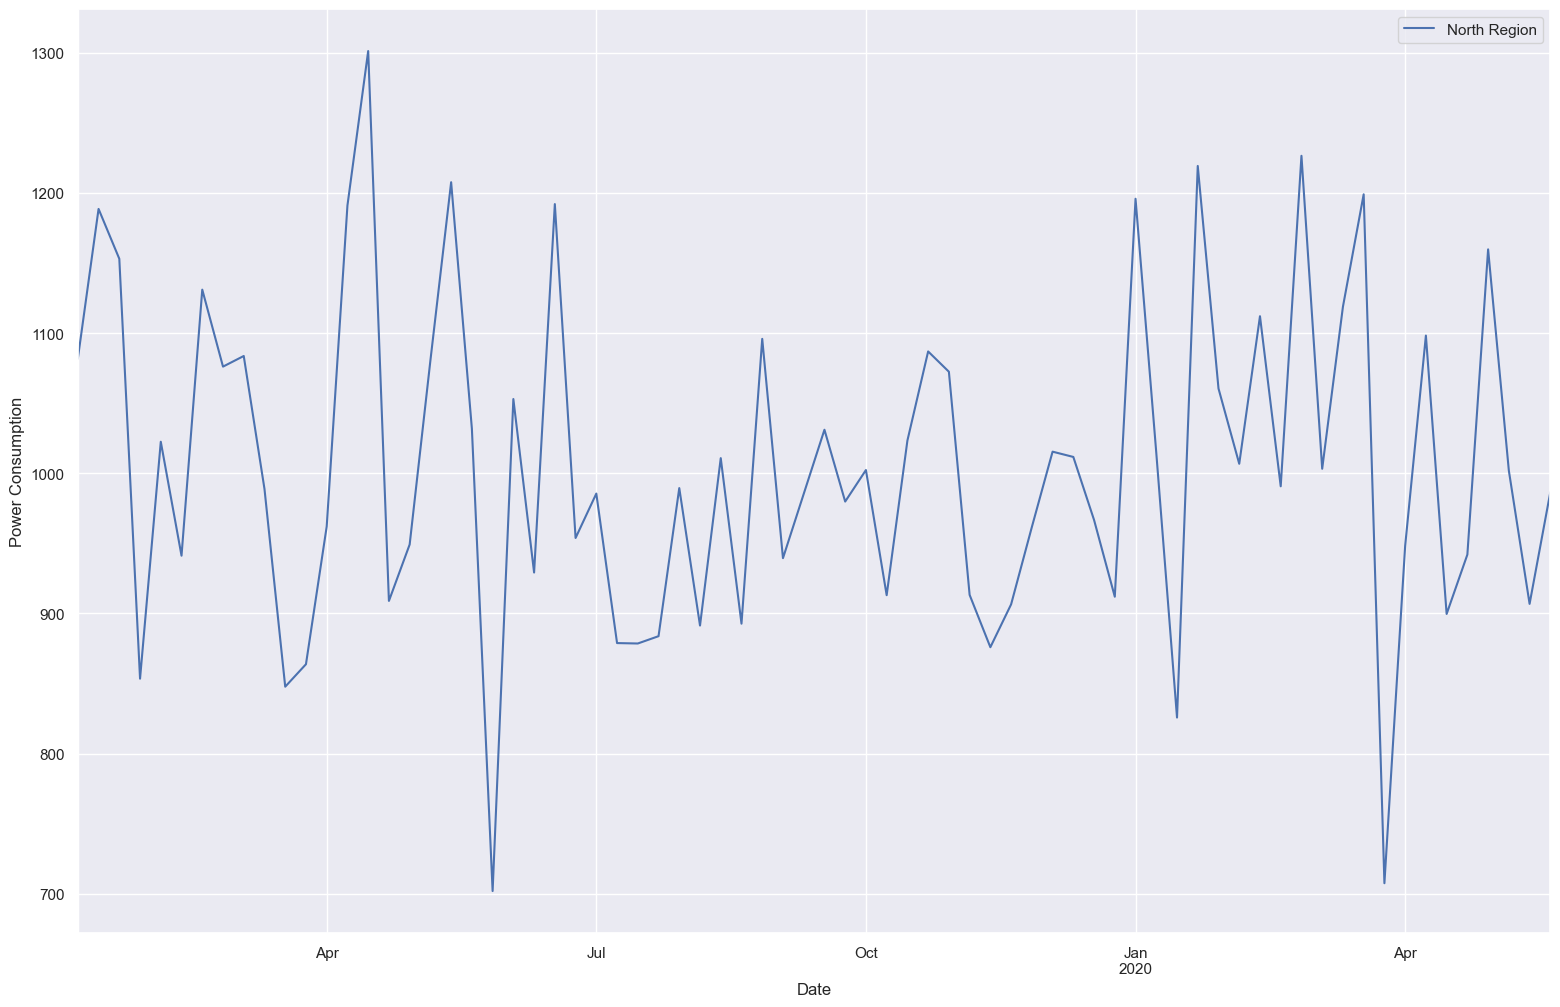

In [8]:
#Resampling the data weekly & considering mean power consumption
NR = NR.resample('W').mean()
NR.plot(figsize=(19,12))
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

### Decomposition Plots

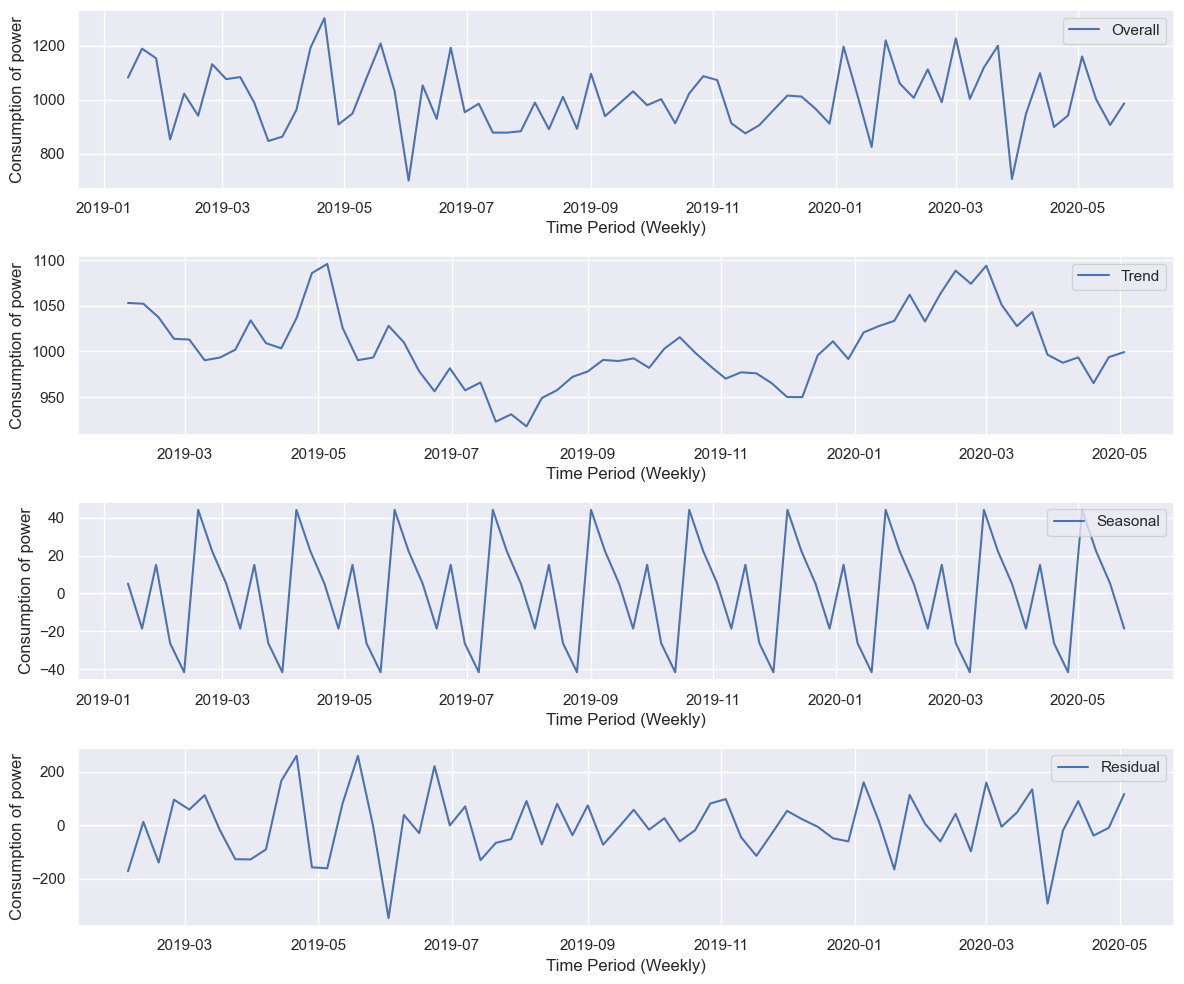

In [9]:
#Checking the components of time series data 
decomposition = seasonal_decompose(NR,period=7)
d_trend_p = decomposition.trend
d_seasonal_p = decomposition.seasonal
d_residual_p = decomposition.resid

#plotting the graphs
fig,ax = plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(NR,label='Overall')
ax[0].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[0].set_ylabel('Consumption of power',fontsize=12)
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_p,label='Trend')
ax[1].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[1].set_ylabel('Consumption of power',fontsize=12)
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_p,label='Seasonal')
ax[2].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[2].set_ylabel('Consumption of power',fontsize=12)
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_p,label='Residual')
ax[3].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[3].set_ylabel('Consumption of power',fontsize=12)
ax[3].legend(loc='upper right')
           
plt.tight_layout()

### Checking Stationarity of Data & Plotting ACF & PACF Plots

In [10]:
#Augmented dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make it stationary"
        
    return(ret)

In [11]:
#Checking stationarity of whole data
checkStationarity(NR)

'Data is Stationary. Proceed to model building'

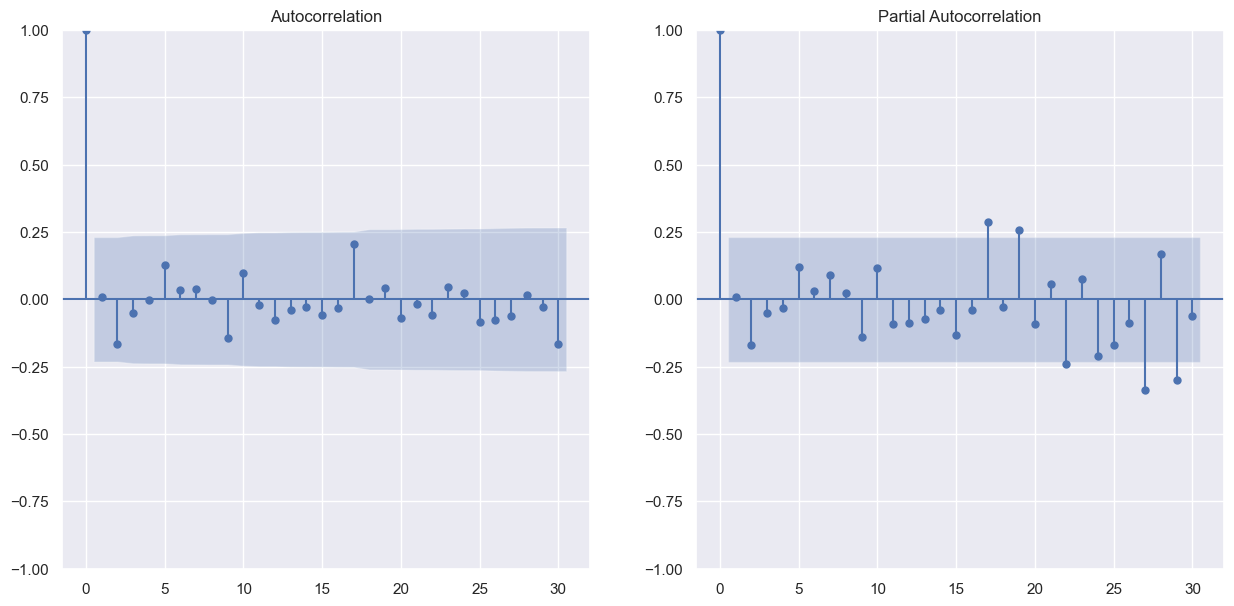

In [12]:
#Plotting ACF & PACF plots of whole data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(NR,lags=30,ax=ax[0])
plot_pacf(NR,lags=30,ax=ax[1])
plt.show()

In [13]:
#Checking stationarity of seasonal compnent
checkStationarity(d_seasonal_p)

'Data is Stationary. Proceed to model building'

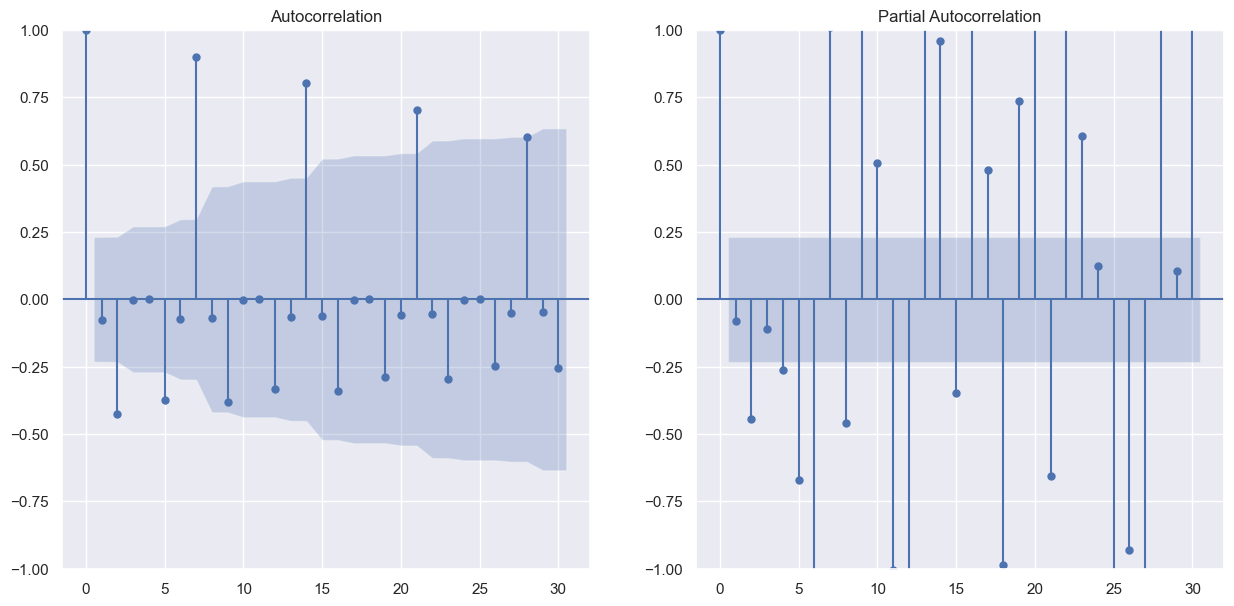

In [14]:
#Plotting ACF & PACF plots of seasonal component
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_p,lags=30,ax=ax[0])
plot_pacf(d_seasonal_p,lags=30,ax=ax[1])
plt.show()

## Time Series Model Building

In [15]:
#Splitting the data into train and test by row indexing
ss = int(len(NR)*0.70)
train_pos = NR[:ss]
test_pos = NR[ss:]

### SARIMAX model

In [16]:
#As we have seasonality in our data so we are taking SARIMAX model
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
    for j in range(2):
        for k in range(5):
            for l in range(5):
                sarima_pos=SARIMAX(NR,order=(i,0,j),seasonal_order=(k,0,l,7),enforce_stationarity=False).fit()
                p.append(i)
                q.append(j)
                P.append(k)
                Q.append(l)
                aic.append(sarima_pos.aic)

In [17]:
# Checkin the best combination of p,d,q,P,D,Q based on AIC score
df1=pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df1.sort_values(by='AIC',ascending=True).head() 

,p,q,P,Q,AIC
79,1,1,0,4,532.743145
84,1,1,1,4,534.492544
89,1,1,2,4,536.472851
70,1,0,4,0,538.260928
94,1,1,3,4,538.475203


### Model Prediction & Forecasting

In [18]:
# Function to show the prediction & forecasting
def TSAplots(data=NR,train=train_pos,test=test_pos,p=1,d=0,q=1,P=0,Q=4,D=0,title="Trend of electricity consumption"):
    global m2_pos
    m2_pos=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,7)).fit()
    f2_pos=m2_pos.forecast(len(test))
    new_model_pos=SARIMAX(data,order=(p,d,q),seasonal_order=(P,D,Q,7)).fit()
    fc_pos=new_model_pos.forecast(30)
    plt.subplots(figsize=(20,12))
    plt.plot(data,color='orange',label='Actual')
    plt.plot(fc_pos,color='green',label='Forecast')  
    plt.plot(f2_pos,color='blue',label='Predicted')                        
    plt.title(title,fontsize=14)
    plt.xlabel('Time Period (Weekly)',fontsize=12)
    plt.ylabel('Consumption of power',fontsize=12)
    plt.legend(loc='lower left')
    plt.show()

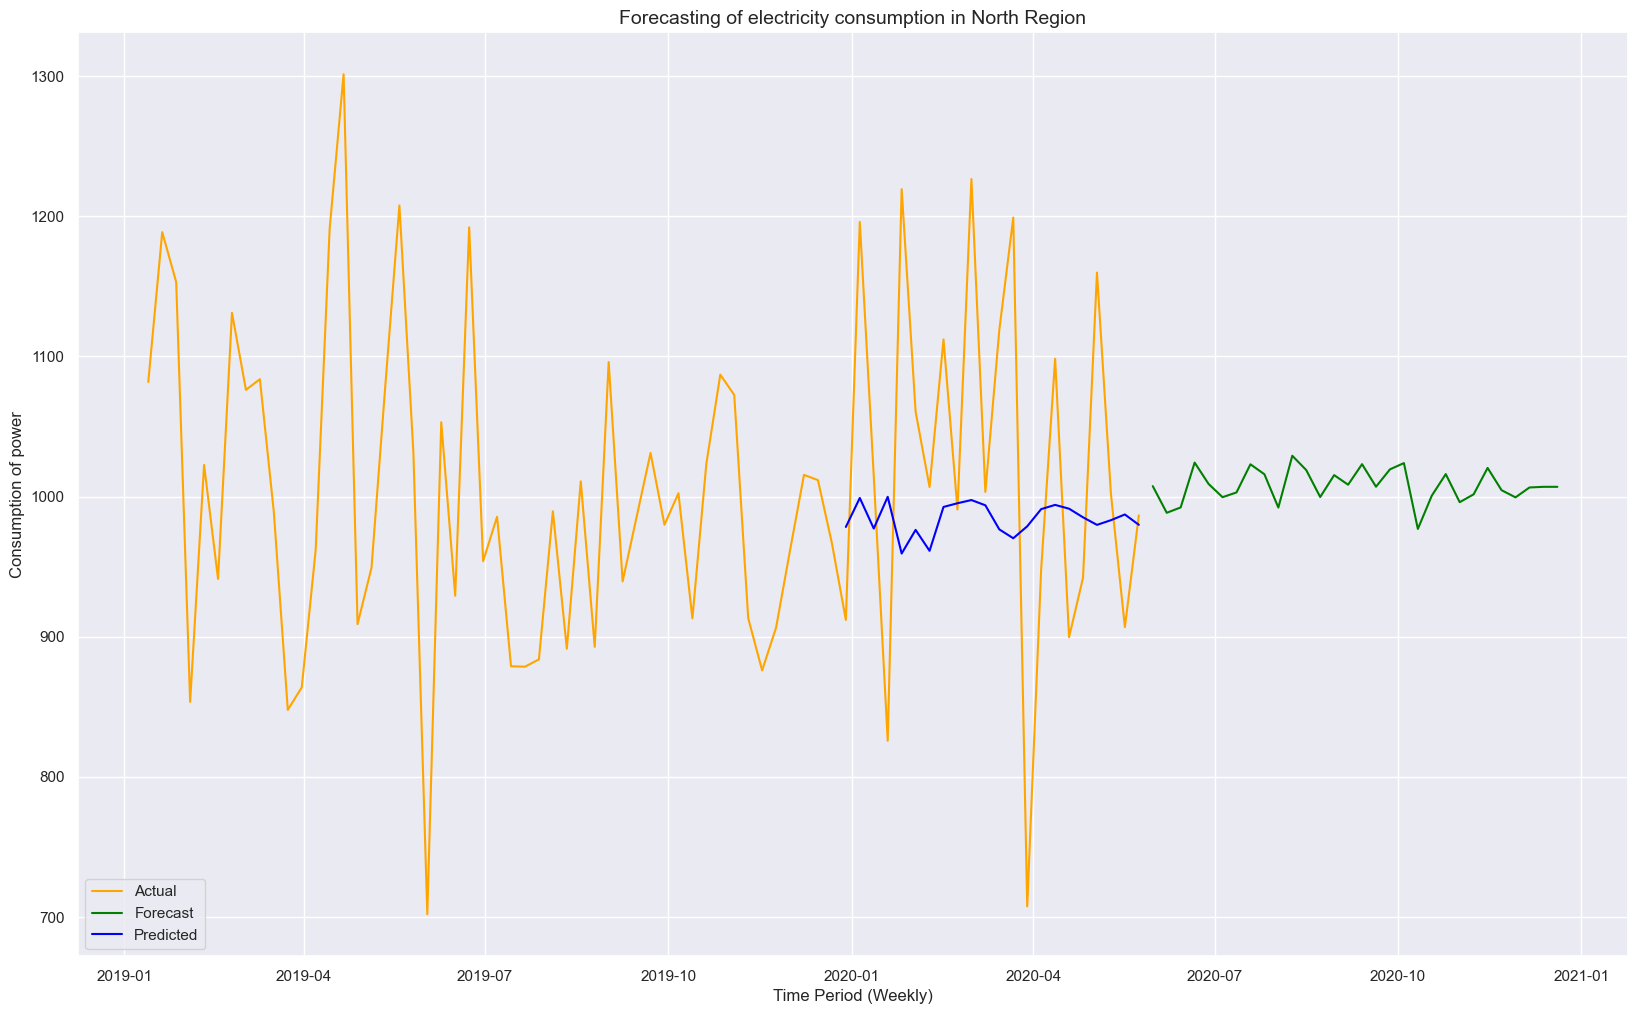

In [19]:
TSAplots(data=NR,train=train_pos,test=test_pos,p = 1,d = 0,q = 1,P = 0,Q = 4,D = 0,title="Forecasting of electricity consumption in North Region")

### Model Summary

In [20]:
#To chek if our model is stationary or not we are performing Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [21]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                 North Region   No. Observations:                   50
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2, 3, 4], 7)   Log Likelihood                -310.246
Date:                                      Mon, 05 Jun 2023   AIC                            634.492
Time:                                              16:34:47   BIC                            647.877
Sample:                                          01-13-2019   HQIC                           639.589
                                               - 12-22-2019                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   6239.551      0.000       1.000       1.000
ma.L1         -0.9183      0.128     -7.183      0.000      -1.169      -0.668
ma.S.L7       -0.0487      0.161     -0.302      0.763      -0.365       0.268
ma.S.L14      -0.1930      0.234     -0.824      0.410      -0.652       0.266
ma.S.L21      -0.0968      0.225     -0.430      0.667      -0.538       0.345
ma.S.L28       0.0424      0.381      0.112      0.911      -0.703       0.788
sigma2      1.242e+04   2672.136      4.649      0.000    7184.628    1.77e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.61   Prob(JB):                         0.59
Heteroskedasticity (H):               0.22   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Thanks for checking out, hope it helped you

## Forecasting Electricity consumption in South Region

In [22]:
SR = df[['South Region']]
SR.head()

,South Region
Date,
2019-02-01,922.4
2019-03-01,952.1
2019-04-01,921.8
2019-05-01,950.3
2019-06-01,964.5


In [23]:
#Checking the null values
SR.isnull().sum()

South Region    0
dtype: int64

### Data Distribution & Resampling

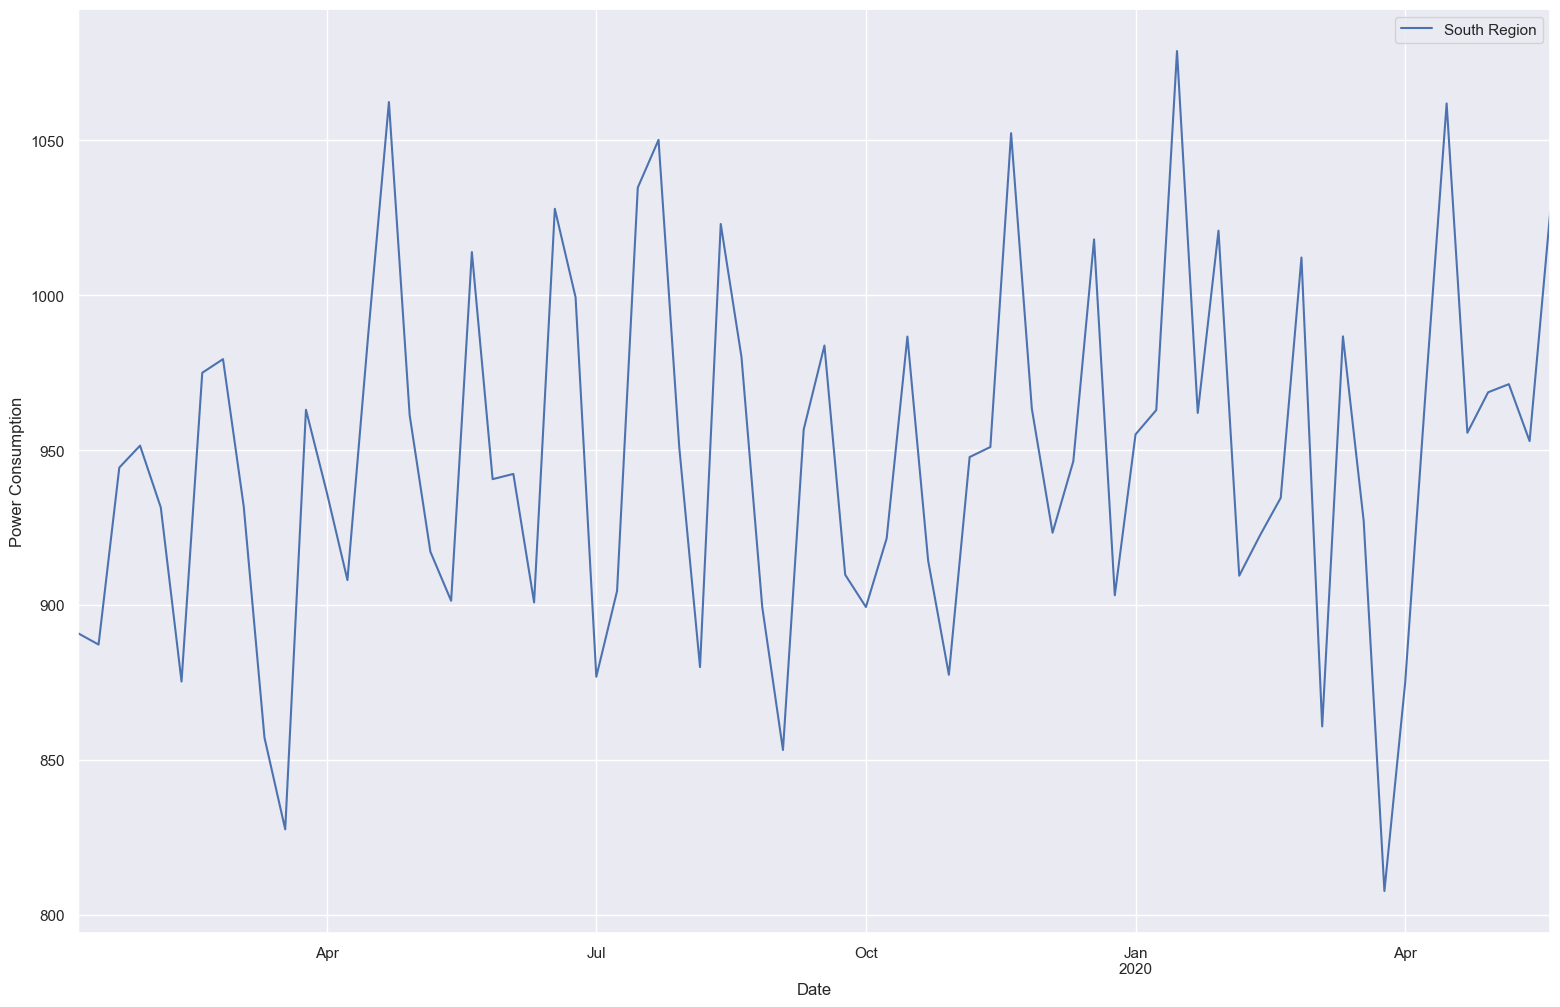

In [24]:
#Resampling the data weekly & considering mean power consumption
SR = SR.resample('W').mean()
SR.plot(figsize=(19,12))
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

### Decomposition Plots

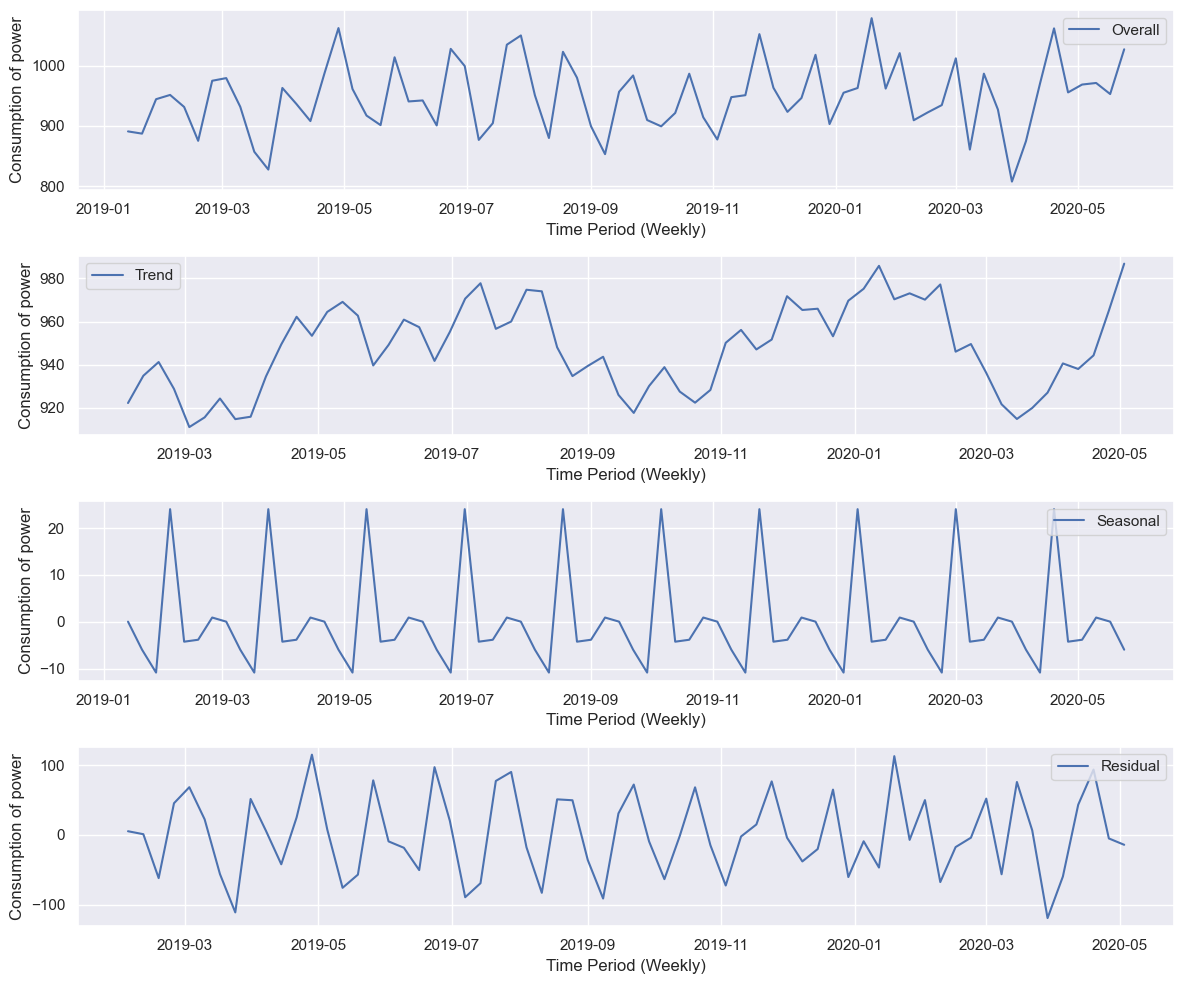

In [25]:
#Checking the components of time series data 
decomposition = seasonal_decompose(SR,period=7)
d_trend_p = decomposition.trend
d_seasonal_p = decomposition.seasonal
d_residual_p = decomposition.resid

#plotting the graphs
fig,ax = plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(SR,label='Overall')
ax[0].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[0].set_ylabel('Consumption of power',fontsize=12)
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_p,label='Trend')
ax[1].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[1].set_ylabel('Consumption of power',fontsize=12)
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_p,label='Seasonal')
ax[2].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[2].set_ylabel('Consumption of power',fontsize=12)
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_p,label='Residual')
ax[3].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[3].set_ylabel('Consumption of power',fontsize=12)
ax[3].legend(loc='upper right')
           
plt.tight_layout()

### Checking Stationarity of Data & Plotting ACF & PACF Plots

In [26]:
#Checking stationarity of data
checkStationarity(SR)

'Data is Stationary. Proceed to model building'

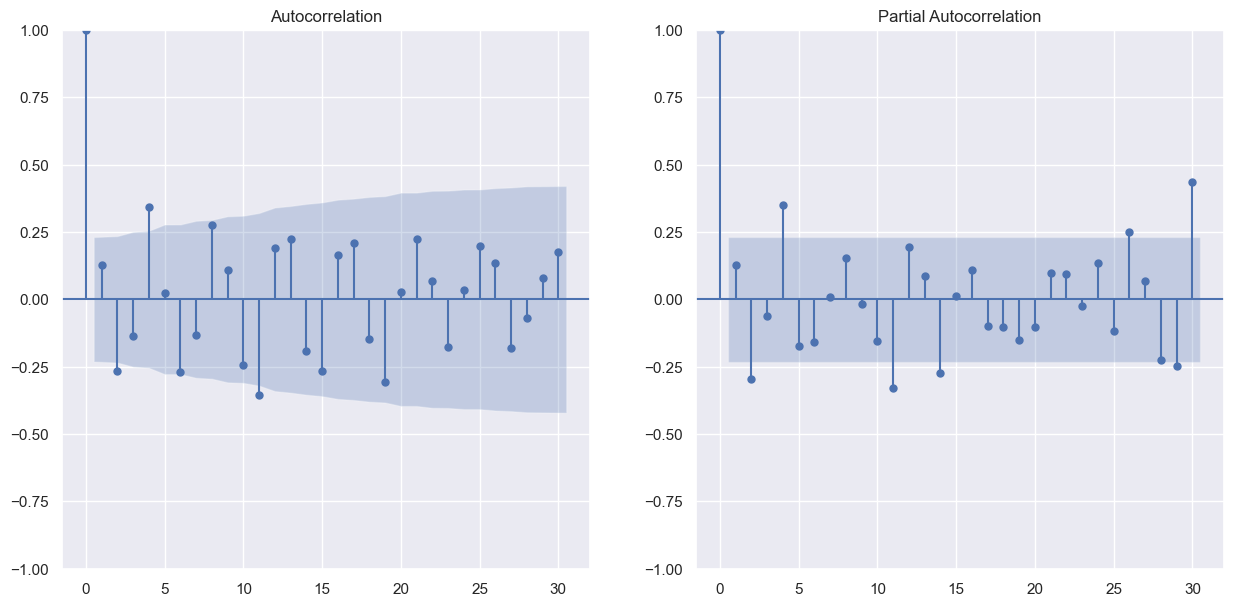

In [27]:
#Plotting ACF & PACF plots of whole data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(SR,lags=30,ax=ax[0])
plot_pacf(SR,lags=30,ax=ax[1])
plt.show()

In [28]:
#Checking stationarity of seasonal compnent
checkStationarity(d_seasonal_p)

'Data is Stationary. Proceed to model building'

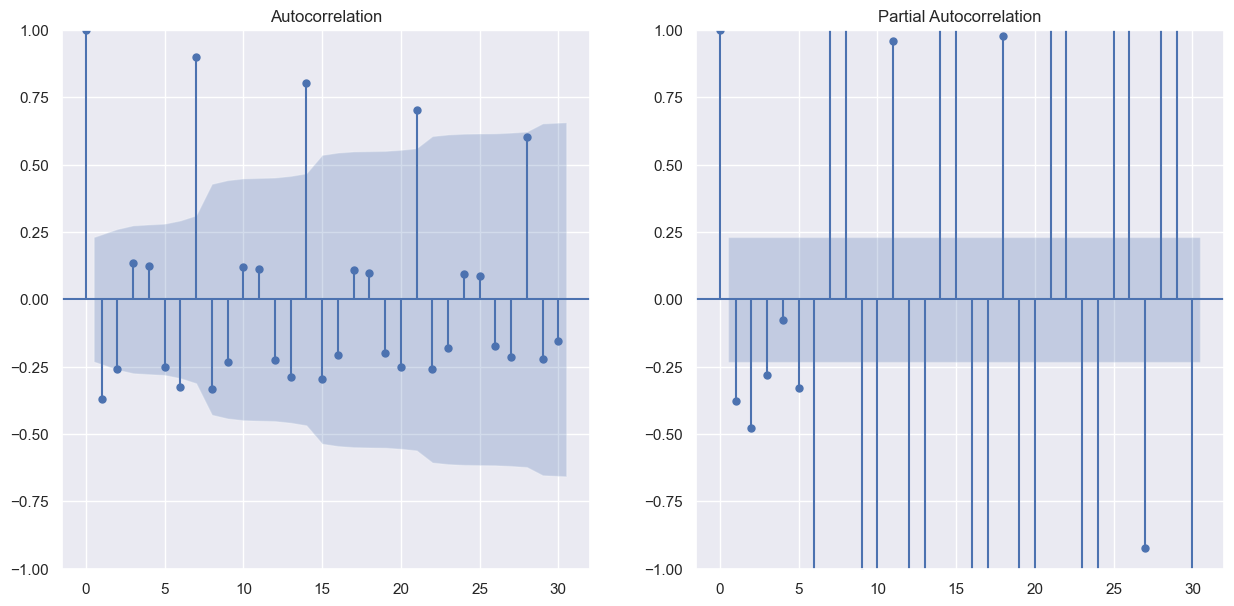

In [29]:
#Plotting ACF & PACF plots of seasonal component
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_p,lags=30,ax=ax[0])
plot_pacf(d_seasonal_p,lags=30,ax=ax[1])
plt.show()

## Time Series Model Building

In [30]:
#Splitting the data into train and test by row indexing
ss = int(len(SR)*0.70)
train_pos = SR[:ss]
test_pos = SR[ss:]

### SARIMAX model

In [31]:
#As we have seasonality in our data so we are taking SARIMAX model
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
    for j in range(2):
        for k in range(5):
            for l in range(5):
                sarima_pos=SARIMAX(SR,order=(i,0,j),seasonal_order=(k,0,l,7),enforce_stationarity=False).fit()
                p.append(i)
                q.append(j)
                P.append(k)
                Q.append(l)
                aic.append(sarima_pos.aic)

In [32]:
#Checkin the best combination of p,d,q,P,D,Q based on AIC score
df1=pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df1.sort_values(by='AIC',ascending=True).head() 

,p,q,P,Q,AIC
79,1,1,0,4,479.105325
84,1,1,1,4,480.532026
89,1,1,2,4,480.738395
94,1,1,3,4,482.230288
70,1,0,4,0,482.902146


### Model Prediction & Forecasting

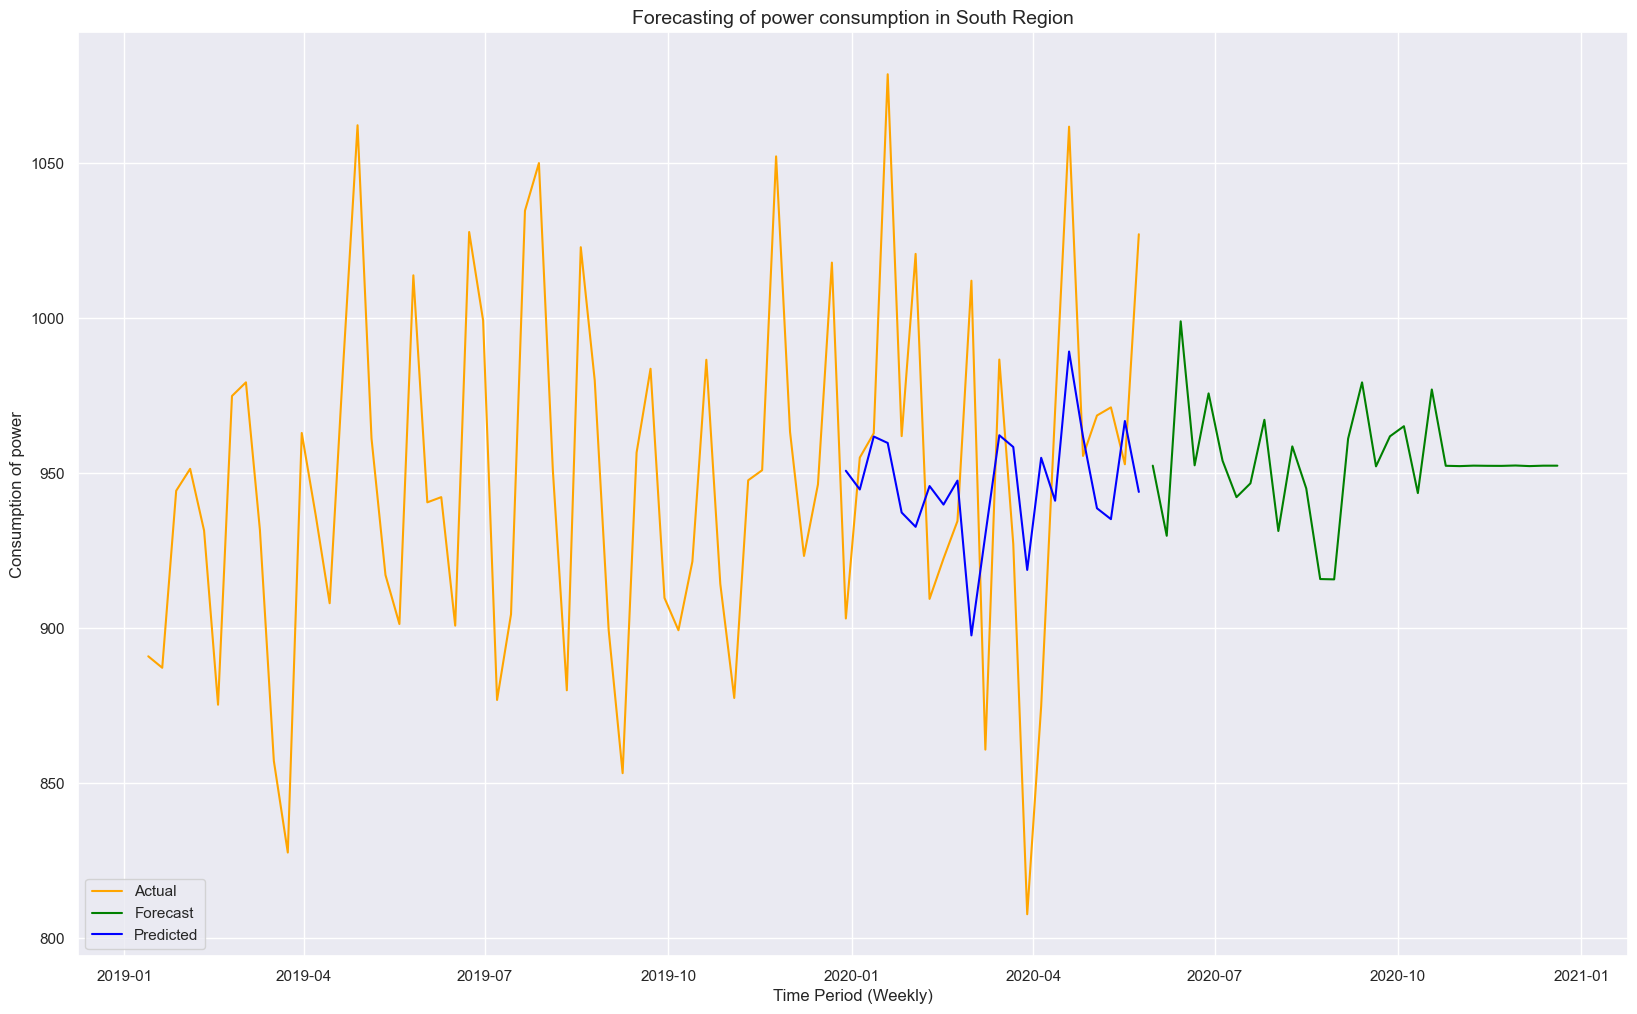

In [33]:
TSAplots(data=SR,train=train_pos,test=test_pos,p = 1,d = 0,q = 1,P = 0,Q = 4,D = 0,title="Forecasting of power consumption in South Region")

### Model Summary

In [34]:
#To chek if our model is stationary or not we are performing Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [35]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                 South Region   No. Observations:                   50
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2, 3, 4], 7)   Log Likelihood                -272.374
Date:                                      Mon, 05 Jun 2023   AIC                            558.748
Time:                                              16:36:28   BIC                            572.132
Sample:                                          01-13-2019   HQIC                           563.845
                                               - 12-22-2019                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   5.48e-05   1.83e+04      0.000       1.000       1.000
ma.L1         -0.9379      0.106     -8.880      0.000      -1.145      -0.731
ma.S.L7       -0.1863      0.416     -0.448      0.654      -1.001       0.628
ma.S.L14      -0.2729      0.442     -0.618      0.537      -1.138       0.593
ma.S.L21       0.3578      0.355      1.008      0.314      -0.338       1.054
ma.S.L28      -0.1501      0.463     -0.324      0.746      -1.058       0.758
sigma2      2495.1380    996.450      2.504      0.012     542.133    4448.143
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.41   Prob(JB):                         0.48
Heteroskedasticity (H):               0.80   Skew:                             0.34
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting Electricity consumption in West Region

In [36]:
WR = df[['West Region']]
WR.head()

,West Region
Date,
2019-02-01,1111.2
2019-03-01,1100.6
2019-04-01,1041.1
2019-05-01,1052.1
2019-06-01,1056.3


In [37]:
#Checking the null values
WR.isnull().sum()

West Region    0
dtype: int64

### Data Distribution & Resampling

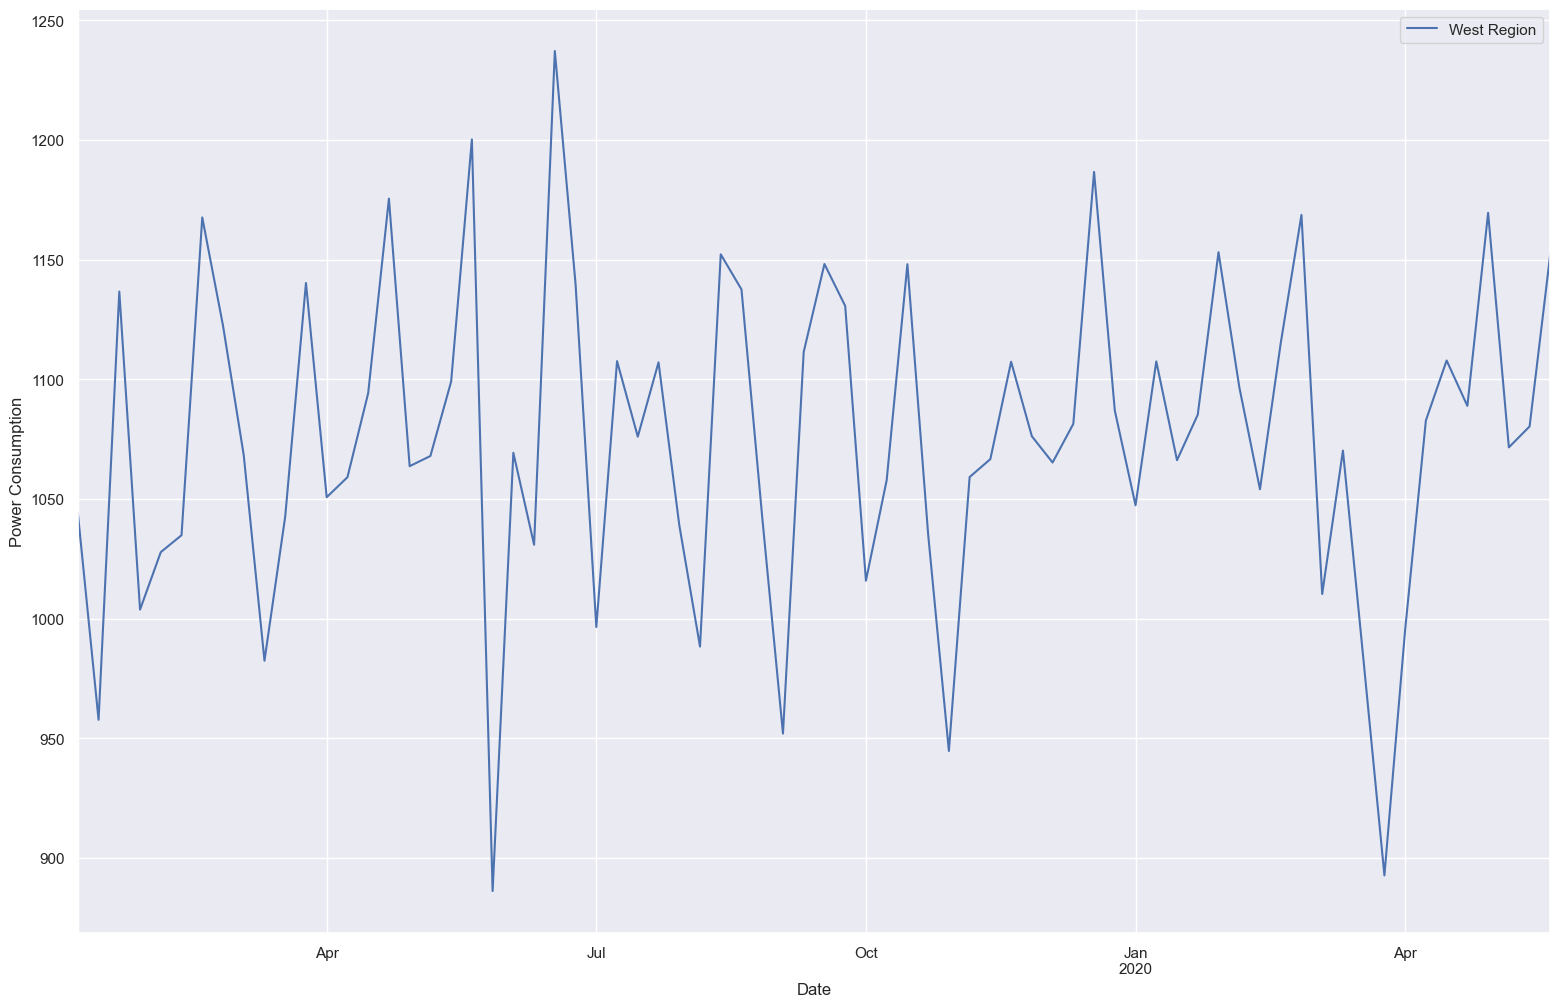

In [38]:
#Resampling the data weekly & considering mean power consumption
WR = WR.resample('W').mean()
WR.plot(figsize=(19,12))
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

### Decomposition Plots

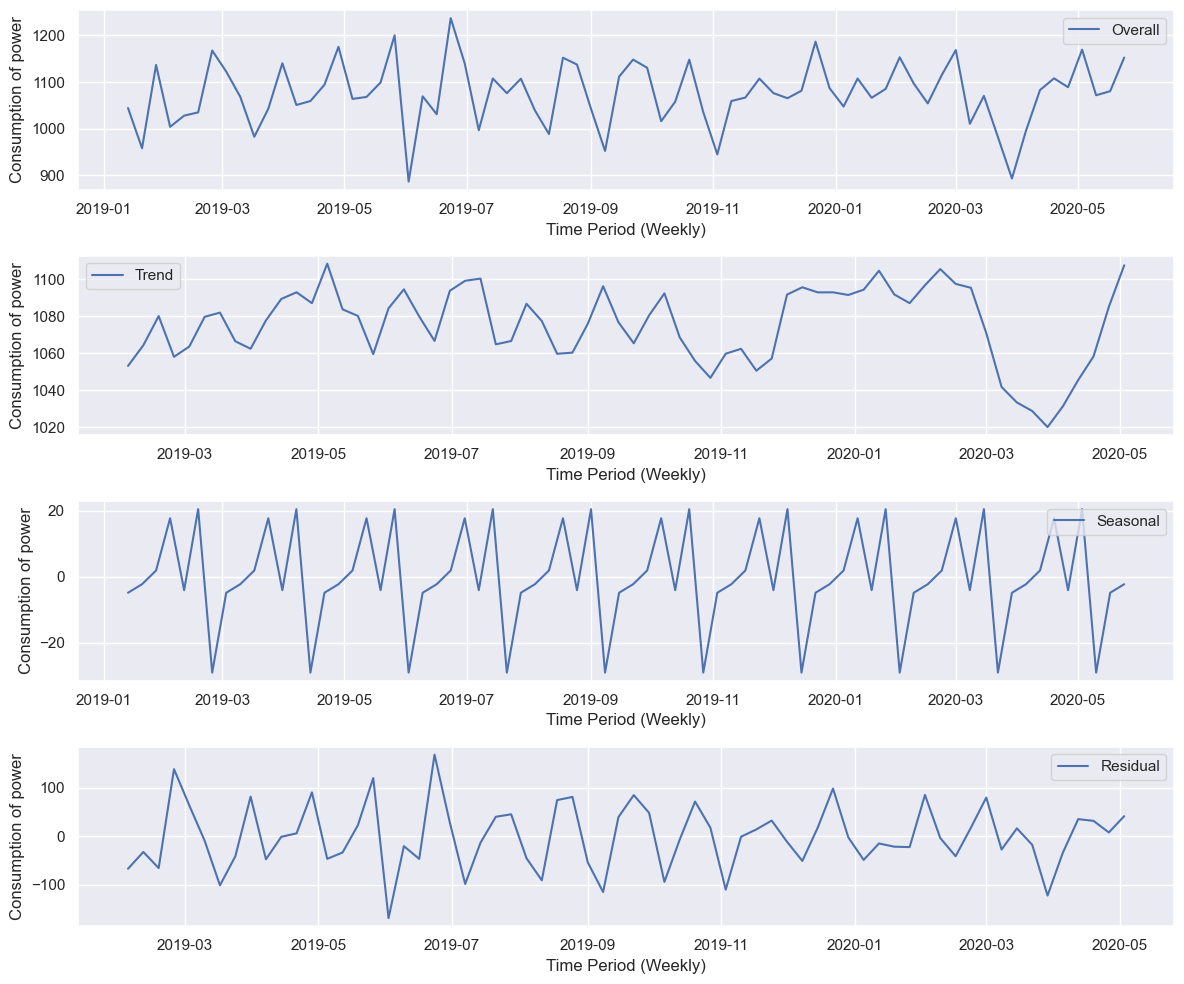

In [39]:
#Checking the components of time series data 
decomposition = seasonal_decompose(WR,period=7)
d_trend_p = decomposition.trend
d_seasonal_p = decomposition.seasonal
d_residual_p = decomposition.resid

#plotting the graphs
fig,ax = plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(WR,label='Overall')
ax[0].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[0].set_ylabel('Consumption of power',fontsize=12)
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_p,label='Trend')
ax[1].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[1].set_ylabel('Consumption of power',fontsize=12)
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_p,label='Seasonal')
ax[2].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[2].set_ylabel('Consumption of power',fontsize=12)
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_p,label='Residual')
ax[3].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[3].set_ylabel('Consumption of power',fontsize=12)
ax[3].legend(loc='upper right')
           
plt.tight_layout()

### Checking Stationarity of Data & Plotting ACF & PACF Plots

In [40]:
#Checking stationarity of whole data
checkStationarity(WR)

'Data is Stationary. Proceed to model building'

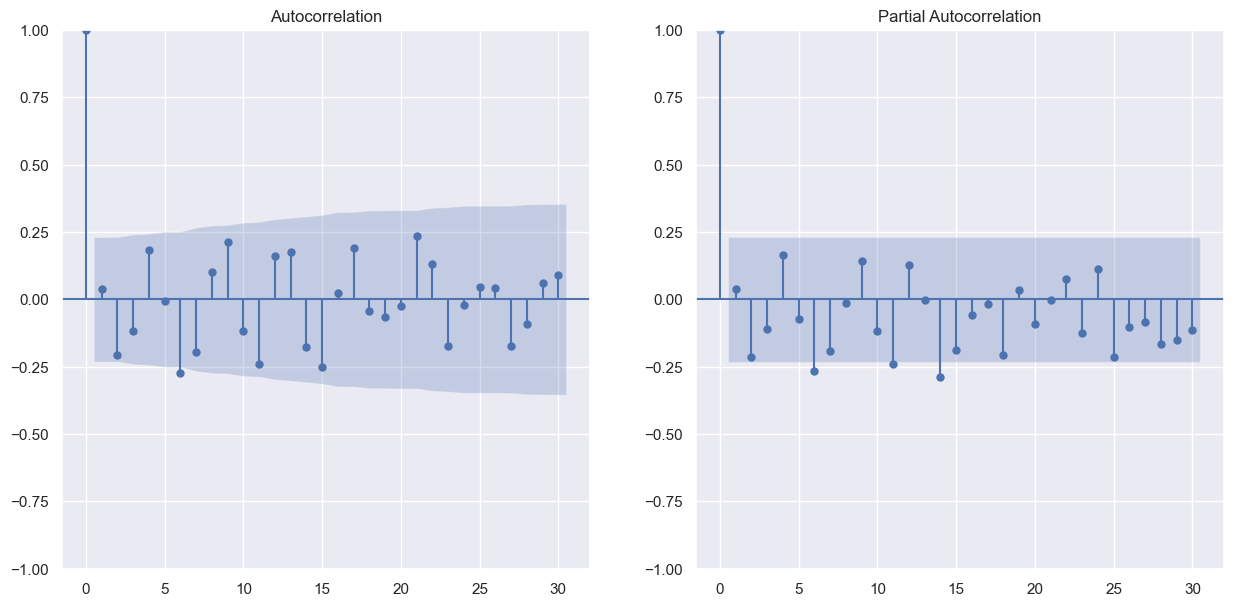

In [41]:
#Plotting ACF & PACF plots of whole data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(WR,lags=30,ax=ax[0])
plot_pacf(WR,lags=30,ax=ax[1])
plt.show()

In [42]:
#Checking stationarity of seasonal compnent
checkStationarity(d_seasonal_p)

'Data is Stationary. Proceed to model building'

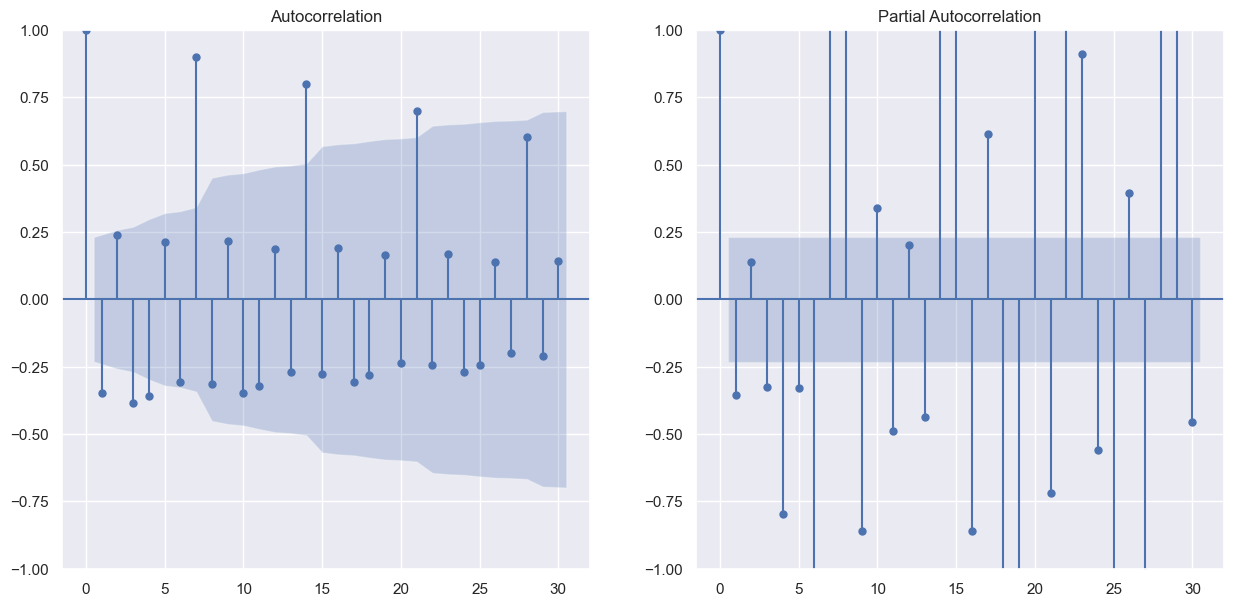

In [43]:
#Plotting ACF & PACF plots of seasonal component
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_p,lags=30,ax=ax[0])
plot_pacf(d_seasonal_p,lags=30,ax=ax[1])
plt.show()

### Time Series Model Building

In [44]:
#Splitting the data into train and test by row indexing
ss = int(len(WR)*0.70)
train_pos = WR[:ss]
test_pos = WR[ss:]

### SARIMAX model

In [45]:
#As we have seasonality in our data so we are taking SARIMAX model
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
    for j in range(2):
        for k in range(5):
            for l in range(5):
                sarima_pos=SARIMAX(WR,order=(i,0,j),seasonal_order=(k,0,l,7),enforce_stationarity=False).fit()
                p.append(i)
                q.append(j)
                P.append(k)
                Q.append(l)
                aic.append(sarima_pos.aic)

In [46]:
#Checkin the best combination of p,d,q,P,D,Q based on AIC score
df1 = pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df1.sort_values(by='AIC',ascending=True).head()

,p,q,P,Q,AIC
79,1,1,0,4,488.329841
84,1,1,1,4,489.403190
70,1,0,4,0,489.773349
94,1,1,3,4,491.035638
89,1,1,2,4,491.579151


### Model Prediction & Forecasting

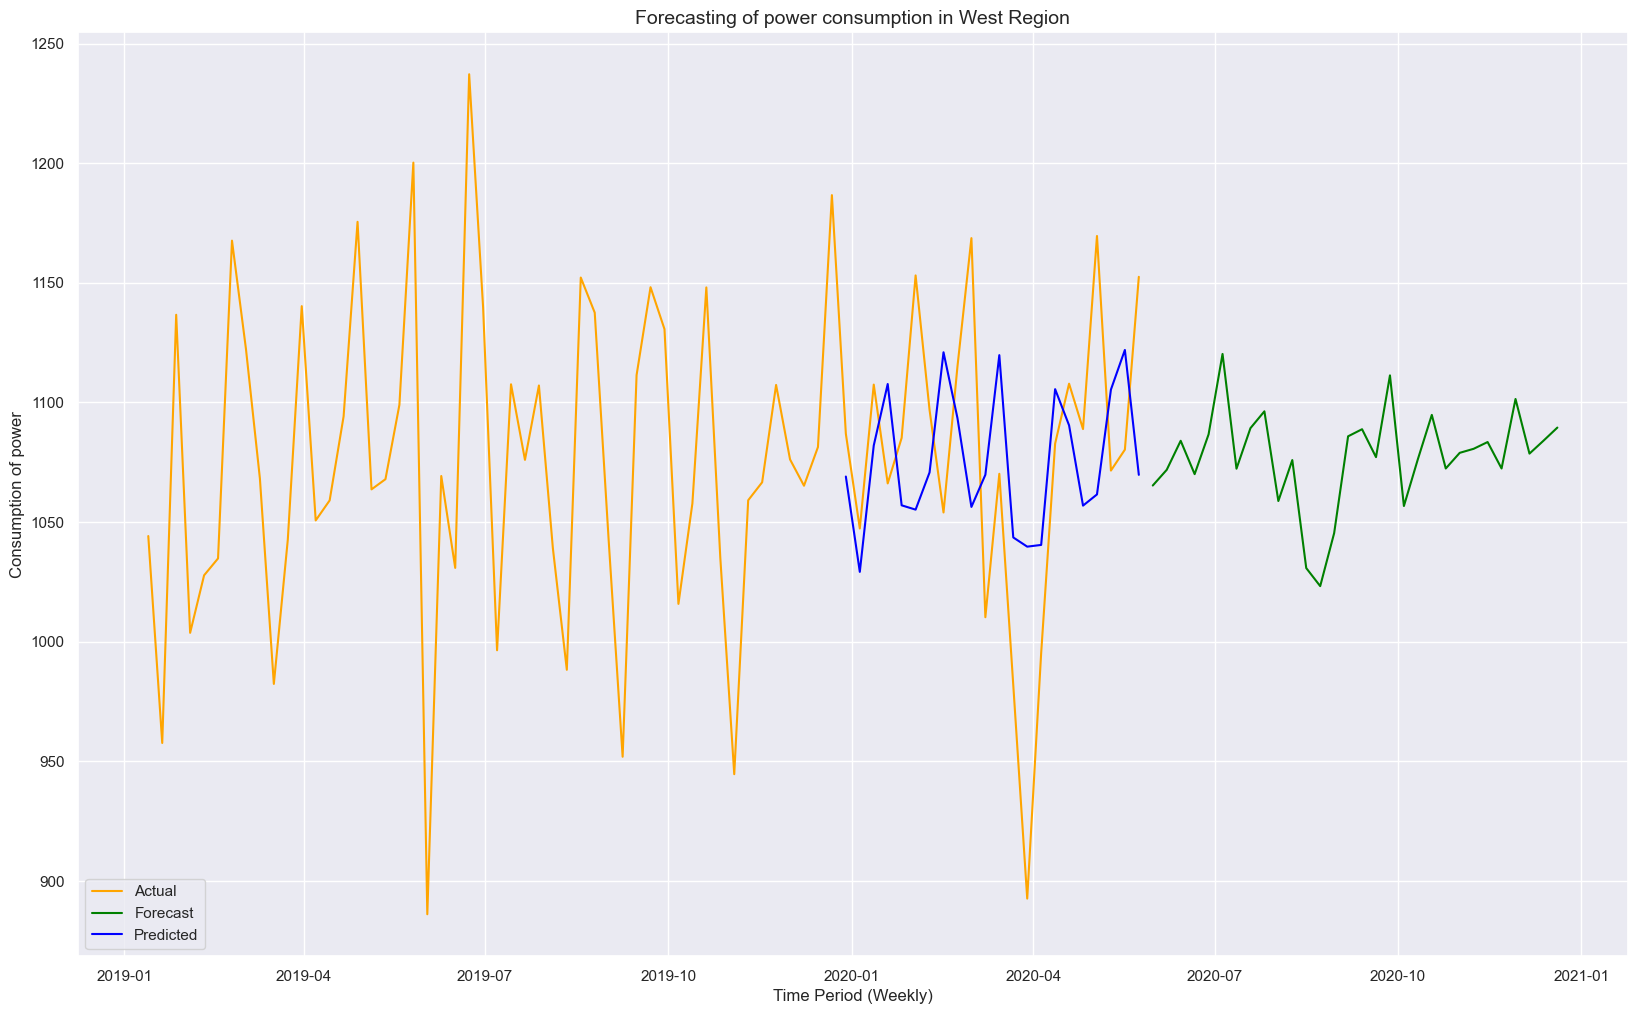

In [47]:
TSAplots(data=WR,train=train_pos,test=test_pos,p = 1,d = 0,q = 1,P = 4,Q = 4,D = 0,title="Forecasting of power consumption in West Region")

### Model Summary

In [48]:
#To chek if our model is stationary or not we are performing Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [49]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                  West Region   No. Observations:                   50
Model:             SARIMAX(1, 0, 1)x(4, 0, [1, 2, 3, 4], 7)   Log Likelihood                -286.135
Date:                                      Mon, 05 Jun 2023   AIC                            594.270
Time:                                              16:38:17   BIC                            615.303
Sample:                                          01-13-2019   HQIC                           602.280
                                               - 12-22-2019                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.010     96.514      0.000       0.979       1.020
ma.L1         -0.9078      0.181     -5.013      0.000      -1.263      -0.553
ar.S.L7       -0.9581      2.431     -0.394      0.694      -5.723       3.807
ar.S.L14       0.0836      0.994      0.084      0.933      -1.864       2.031
ar.S.L21       0.9603      2.859      0.336      0.737      -4.644       6.564
ar.S.L28       0.9142      0.884      1.034      0.301      -0.819       2.647
ma.S.L7        0.7910      2.042      0.387      0.699      -3.212       4.794
ma.S.L14      -0.2518      2.372     -0.106      0.915      -4.901       4.397
ma.S.L21      -0.7912      5.003     -0.158      0.874     -10.597       9.014
ma.S.L28      -0.7463      2.089     -0.357      0.721      -4.841       3.348
sigma2      5515.2597      0.001   4.29e+06      0.000    5515.257    5515.262
===================================================================================
Ljung-Box (L1) (Q):                   2.04   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.15   Prob(JB):                         0.48
Heteroskedasticity (H):               0.87   Skew:                            -0.40
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+23. Standard errors may be unstable.
"""

## Forecasting Electricity consumption in East Region

In [50]:
ER = df[['East Region']]
ER.head()

,East Region
Date,
2019-02-01,287.5
2019-03-01,287.6
2019-04-01,284.0
2019-05-01,274.8
2019-06-01,270.3


In [51]:
#Checking the null values
ER.isnull().sum()

East Region    0
dtype: int64

### Data Distribution & Resampling

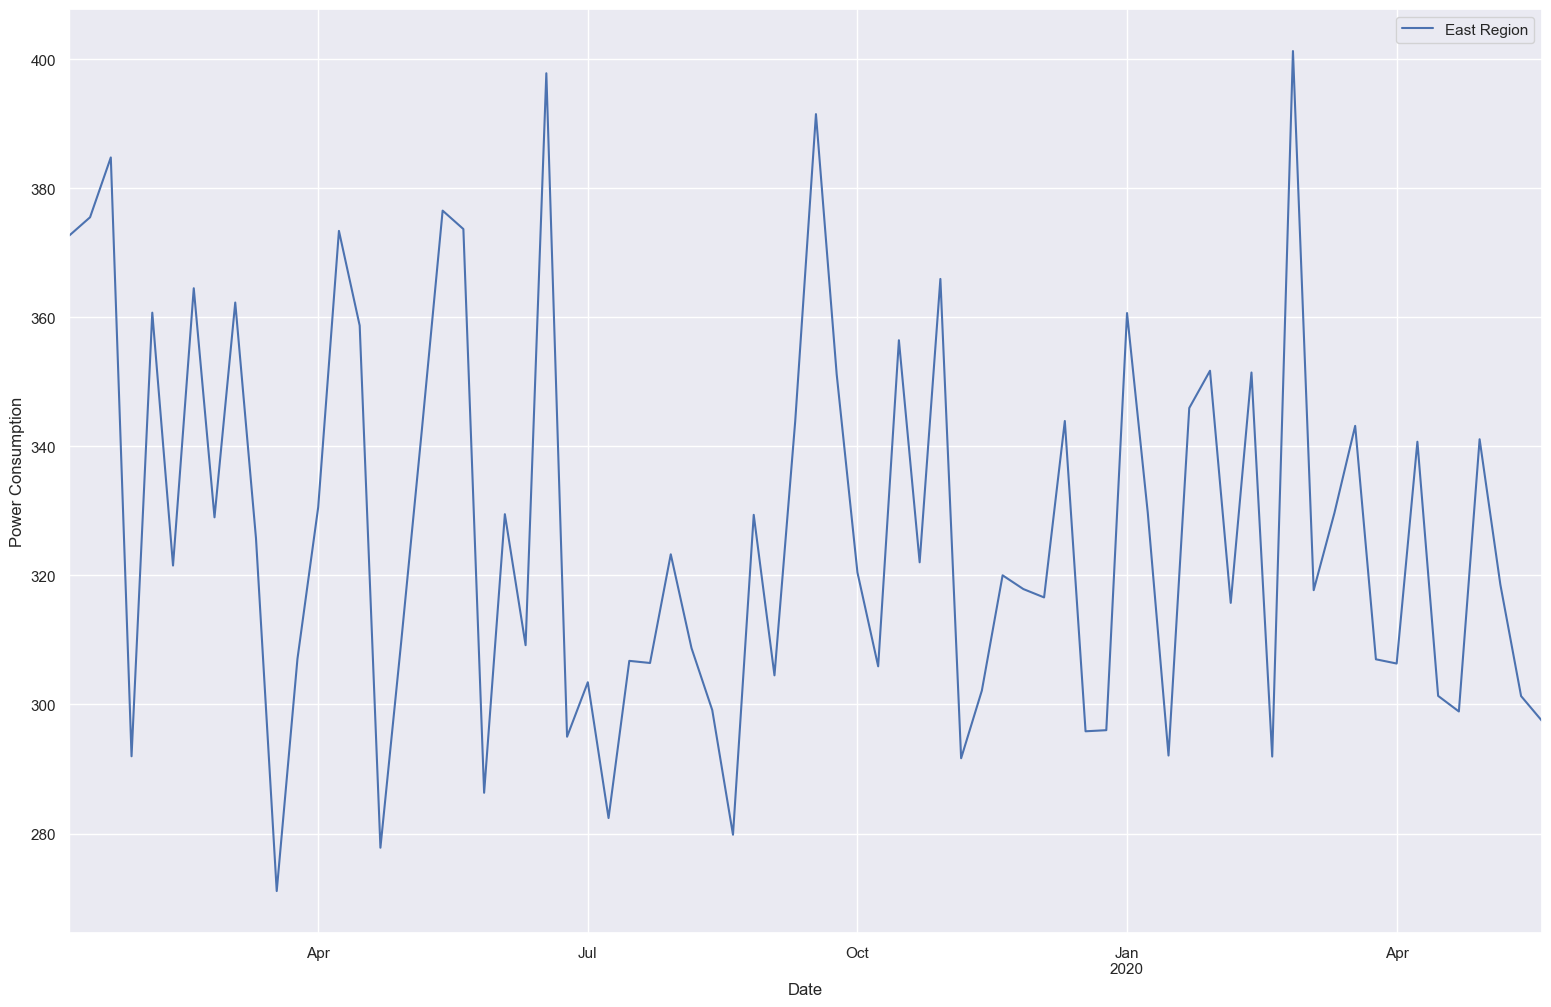

In [52]:
#Resampling the data weekly & considering mean power consumption
ER = ER.resample('W').mean()
ER.plot(figsize=(19,12))
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

### Decomposition Plots

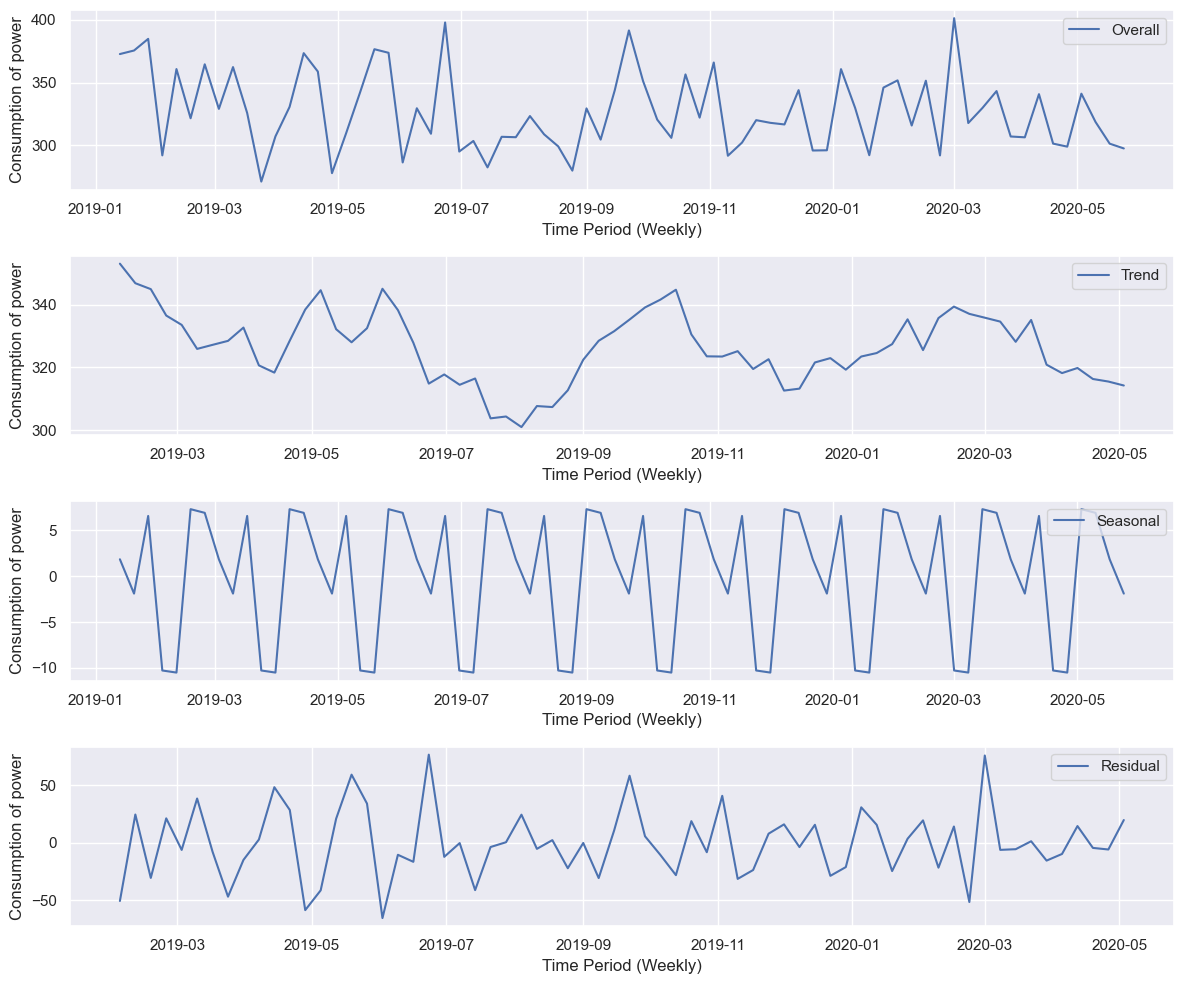

In [53]:
#Checking the components of time series data 
decomposition = seasonal_decompose(ER,period=7)
d_trend_p = decomposition.trend
d_seasonal_p = decomposition.seasonal
d_residual_p = decomposition.resid

#plotting the graphs
fig,ax = plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(ER,label='Overall')
ax[0].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[0].set_ylabel('Consumption of power',fontsize=12)
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_p,label='Trend')
ax[1].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[1].set_ylabel('Consumption of power',fontsize=12)
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_p,label='Seasonal')
ax[2].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[2].set_ylabel('Consumption of power',fontsize=12)
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_p,label='Residual')
ax[3].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[3].set_ylabel('Consumption of power',fontsize=12)
ax[3].legend(loc='upper right')
           
plt.tight_layout()

### Checking Stationarity of Data & Plotting ACF & PACF Plots

In [54]:
#Checking stationarity of whole data
checkStationarity(ER)

'Data is Stationary. Proceed to model building'

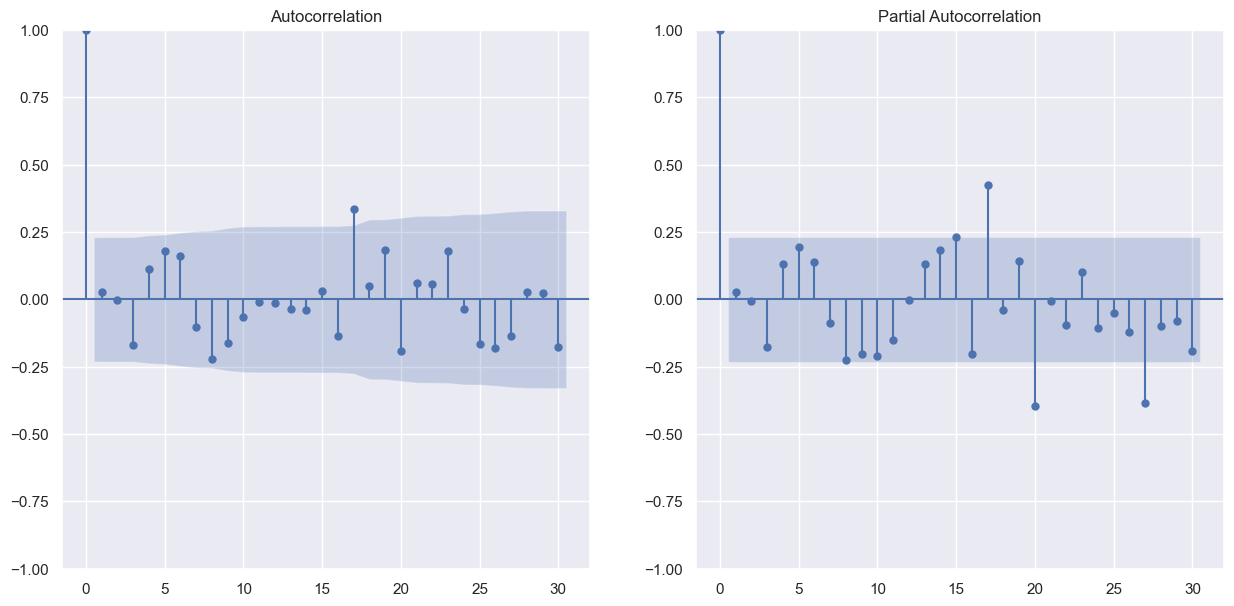

In [55]:
#Plotting ACF & PACF plots of whole data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(ER,lags=30,ax=ax[0])
plot_pacf(ER,lags=30,ax=ax[1])
plt.show()

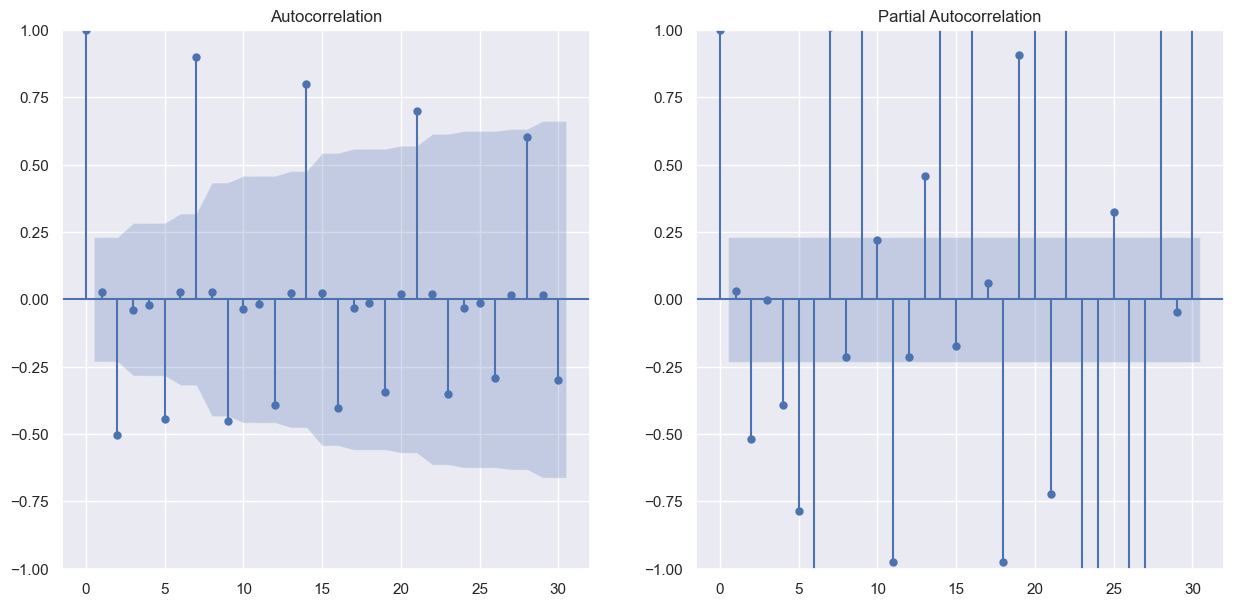

'Data is Stationary. Proceed to model building'

In [56]:
#Checking stationarity of seasonal compnent# Plotting ACF & PACF plots of seasonal component
fig,ax = plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_p,lags=30,ax=ax[0])
plot_pacf(d_seasonal_p,lags=30,ax=ax[1])
plt.show()
checkStationarity(d_seasonal_p)

## Time Series Model Building

In [57]:
#Splitting the data into train and test by row indexing
ss = int(len(ER)*0.70)
train_pos = ER[:ss]
test_pos = ER[ss:]

In [58]:
#As we have seasonality in our data so we are taking SARIMAX model
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
    for j in range(2):
        for k in range(5):
            for l in range(5):
                sarima_pos=SARIMAX(ER,order=(i,0,j),seasonal_order=(k,0,l,7),enforce_stationarity=False).fit()
                p.append(i)
                q.append(j)
                P.append(k)
                Q.append(l)
                aic.append(sarima_pos.aic)

In [59]:
#Checkin the best combination of p,d,q,P,D,Q based on AIC score
df1=pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df1.sort_values(by='AIC',ascending=True).head() 

,p,q,P,Q,AIC
79,1,1,0,4,413.094708
84,1,1,1,4,420.265499
89,1,1,2,4,422.214847
94,1,1,3,4,424.381290
39,0,1,2,4,424.539013


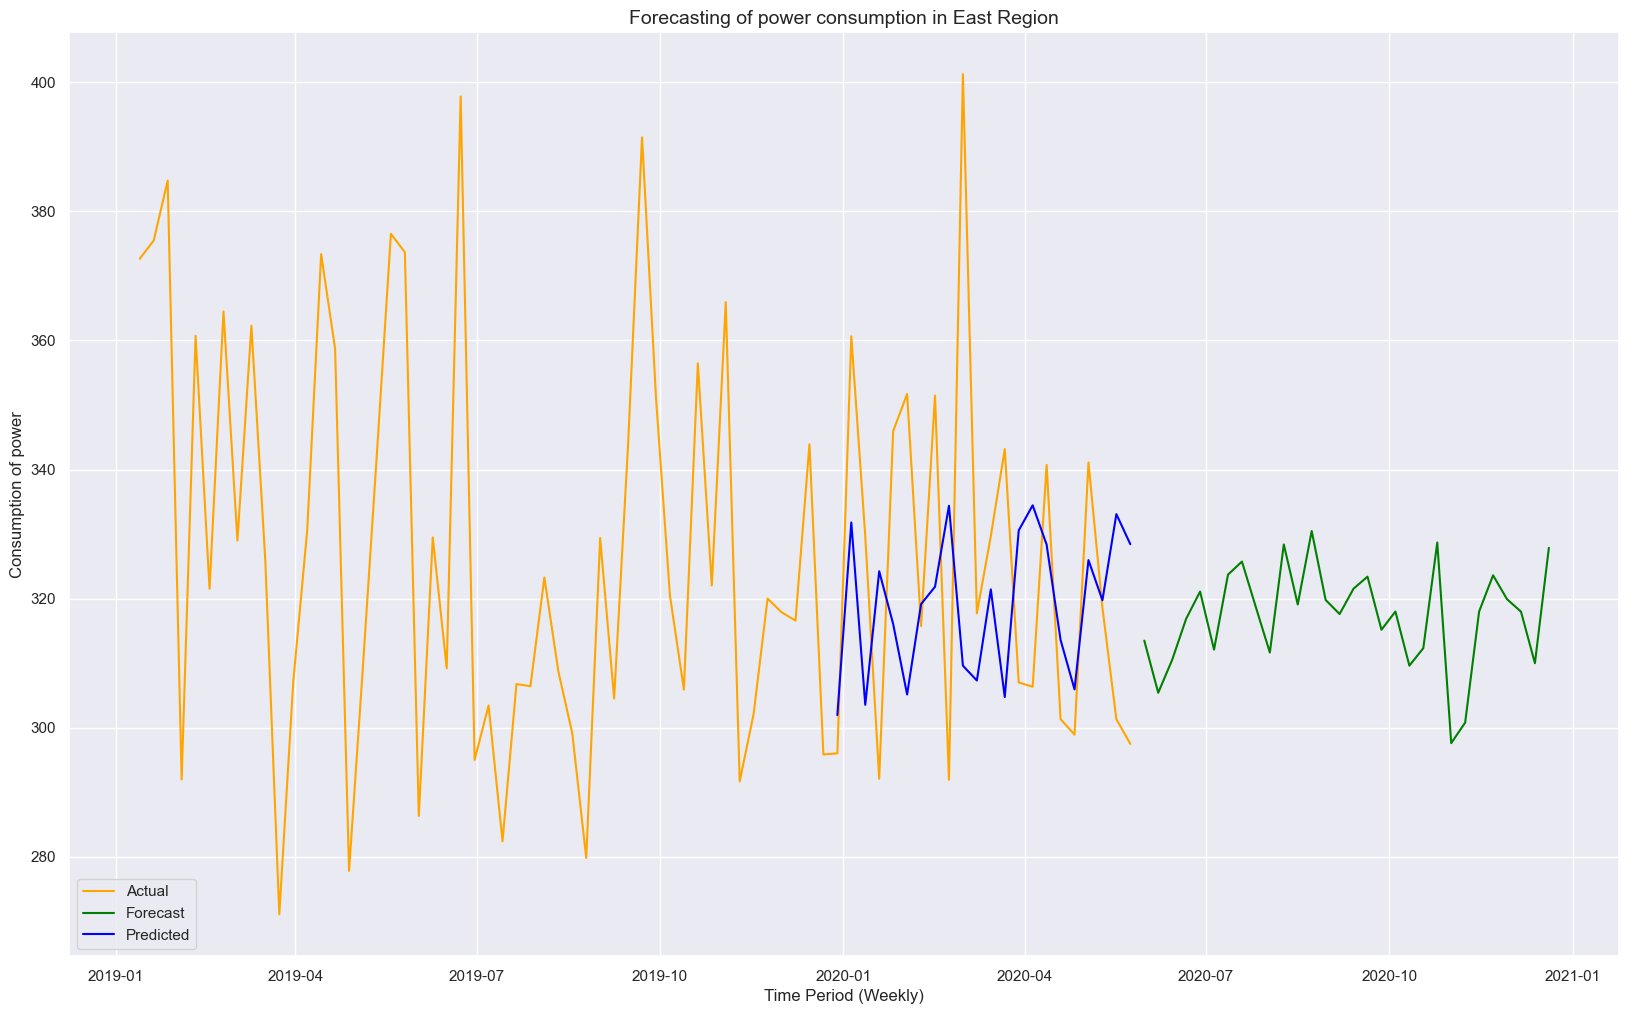

In [60]:
TSAplots(data=ER,train=train_pos,test=test_pos,p = 1,d = 0,q = 1,P = 4,Q = 4,D = 0,title="Forecasting of power consumption in East Region")

### Model Summary

In [61]:
#To chek if our model is stationary or not we are performing Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [62]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                  East Region   No. Observations:                   50
Model:             SARIMAX(1, 0, 1)x(4, 0, [1, 2, 3, 4], 7)   Log Likelihood                -248.360
Date:                                      Mon, 05 Jun 2023   AIC                            518.720
Time:                                              16:40:02   BIC                            539.753
Sample:                                          01-13-2019   HQIC                           526.729
                                               - 12-22-2019                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9985      0.017     57.173      0.000       0.964       1.033
ma.L1         -0.8696      0.155     -5.609      0.000      -1.173      -0.566
ar.S.L7        0.6033      2.816      0.214      0.830      -4.916       6.122
ar.S.L14       0.3095      4.828      0.064      0.949      -9.154       9.773
ar.S.L21      -0.6014      5.281     -0.114      0.909     -10.951       9.748
ar.S.L28       0.6887      2.992      0.230      0.818      -5.175       6.552
ma.S.L7       -0.8908      3.226     -0.276      0.782      -7.214       5.433
ma.S.L14      -0.3001      5.660     -0.053      0.958     -11.394      10.794
ma.S.L21       0.8908      6.453      0.138      0.890     -11.757      13.539
ma.S.L28      -0.6967      3.470     -0.201      0.841      -7.498       6.105
sigma2       910.2938      0.029    3.1e+04      0.000     910.236     910.351
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.73   Prob(JB):                         0.83
Heteroskedasticity (H):               0.60   Skew:                             0.07
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+21. Standard errors may be unstable.
"""

## Forecasting Electricity consumption in Northeastern Region

In [63]:
NER = df[['Northeastern Region']]
NER.head()

,Northeastern Region
Date,
2019-02-01,40.1
2019-03-01,42.1
2019-04-01,40.0
2019-05-01,40.7
2019-06-01,40.3


In [64]:
#Checking the null values
NER.isnull().sum()

Northeastern Region    0
dtype: int64

### Data Distribution & Resampling

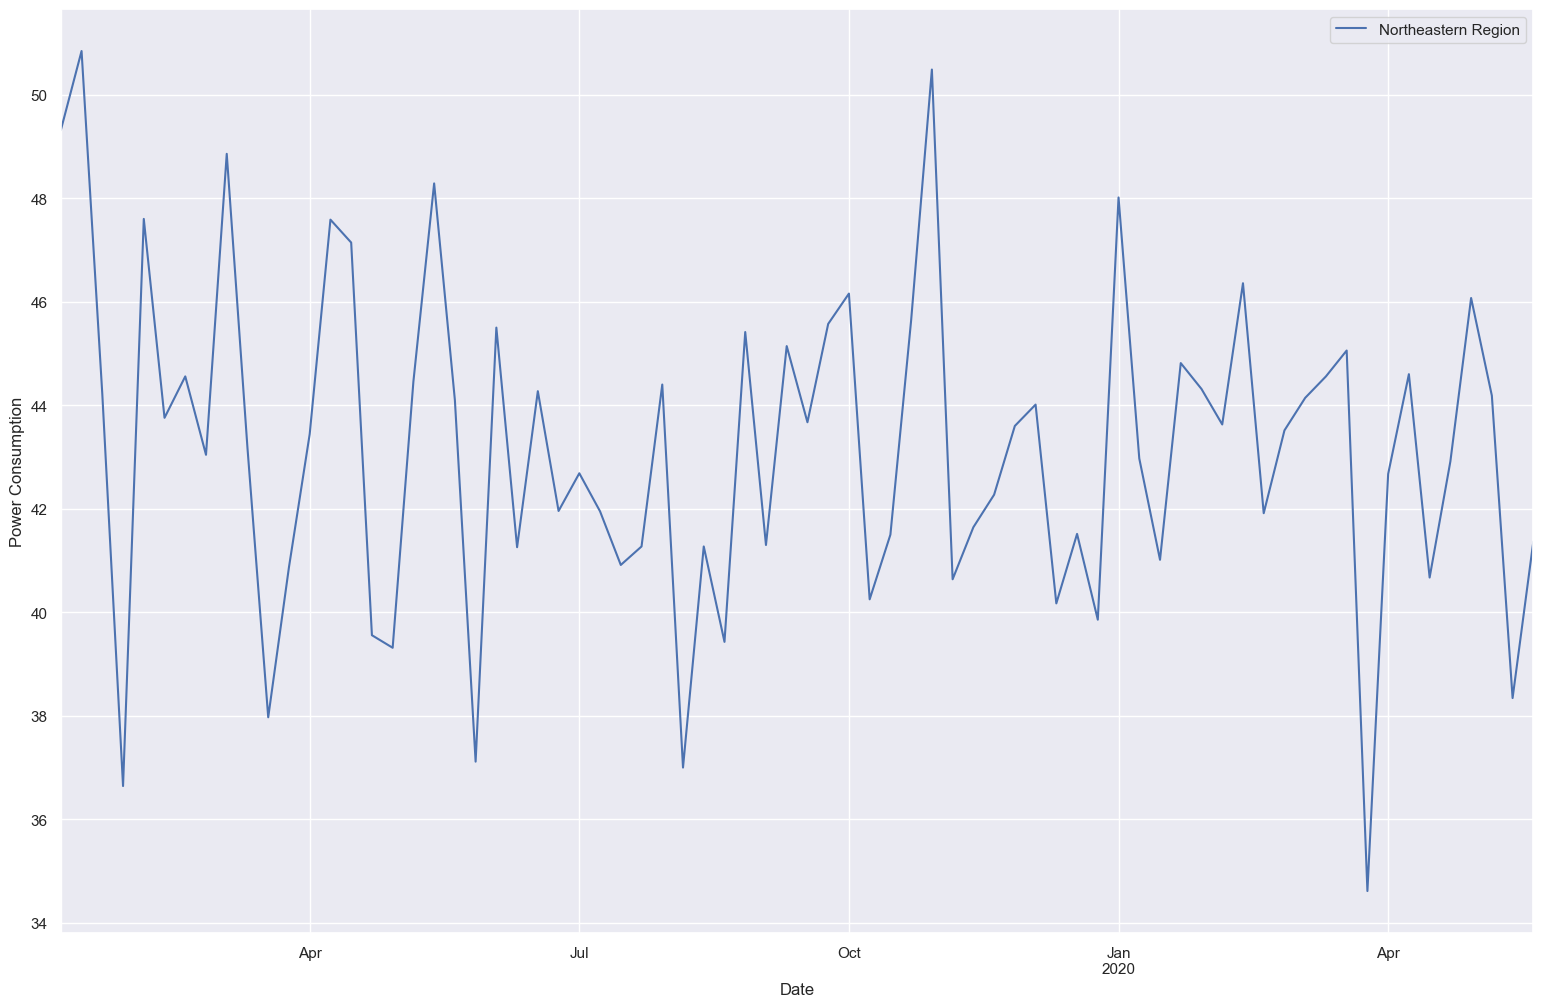

In [65]:
#Resampling the data weekly & considering mean power consumption
NER = NER.resample('W').mean()
NER.plot(figsize=(19,12))
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.show()

### Decomposition Plots

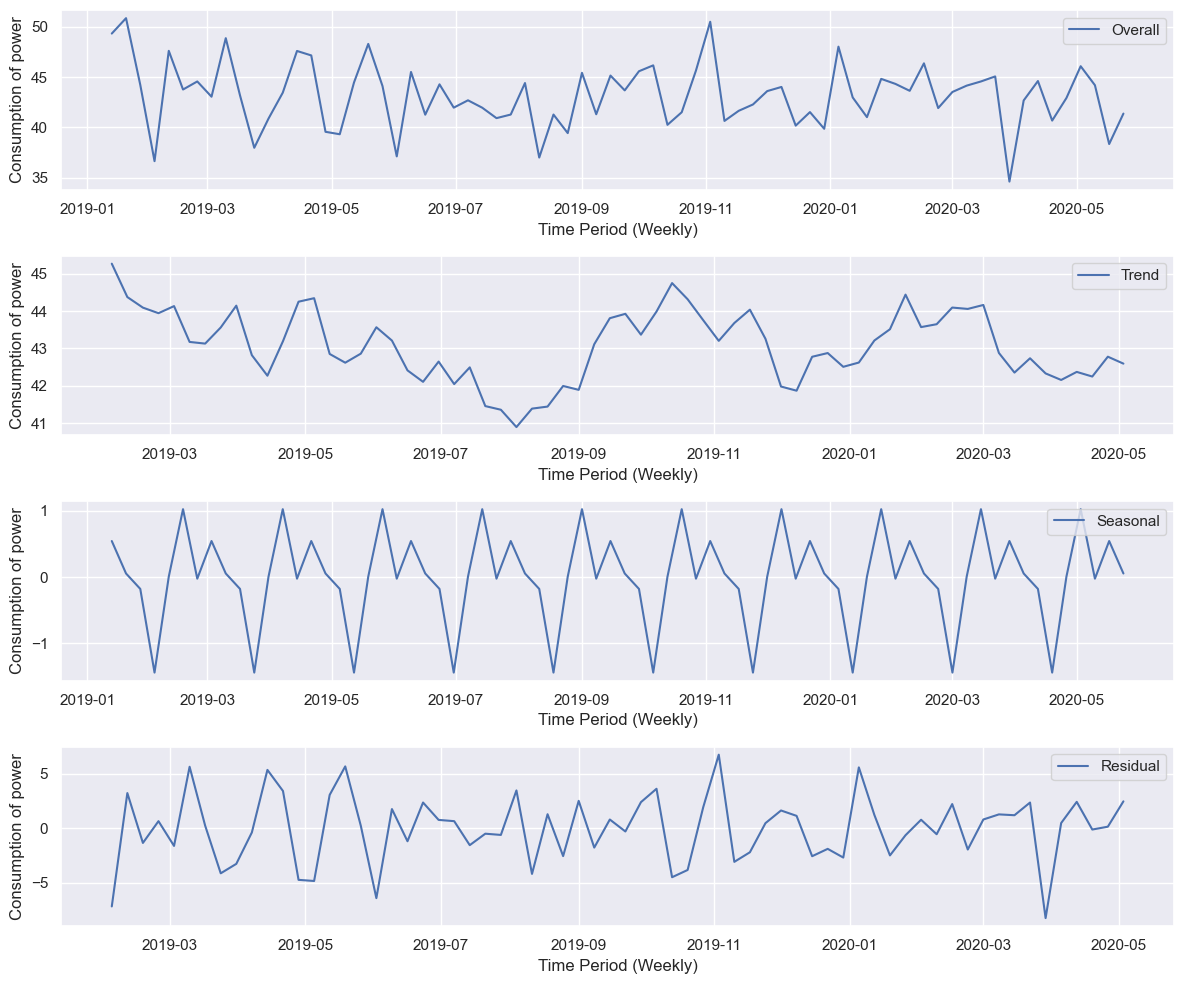

In [66]:
#Checking the components of time series data 
decomposition = seasonal_decompose(NER,period=7)
d_trend_p = decomposition.trend
d_seasonal_p = decomposition.seasonal
d_residual_p = decomposition.resid

#plotting the graphs
fig,ax = plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(NER,label='Overall')
ax[0].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[0].set_ylabel('Consumption of power',fontsize=12)
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_p,label='Trend')
ax[1].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[1].set_ylabel('Consumption of power',fontsize=12)
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_p,label='Seasonal')
ax[2].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[2].set_ylabel('Consumption of power',fontsize=12)
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_p,label='Residual')
ax[3].set_xlabel('Time Period (Weekly)',fontsize=12)
ax[3].set_ylabel('Consumption of power',fontsize=12)
ax[3].legend(loc='upper right')
           
plt.tight_layout()

### Checking Stationarity of Data & Plotting ACF & PACF Plots

In [67]:
#Checking stationarity of whole data
checkStationarity(NER)

'Data is Stationary. Proceed to model building'

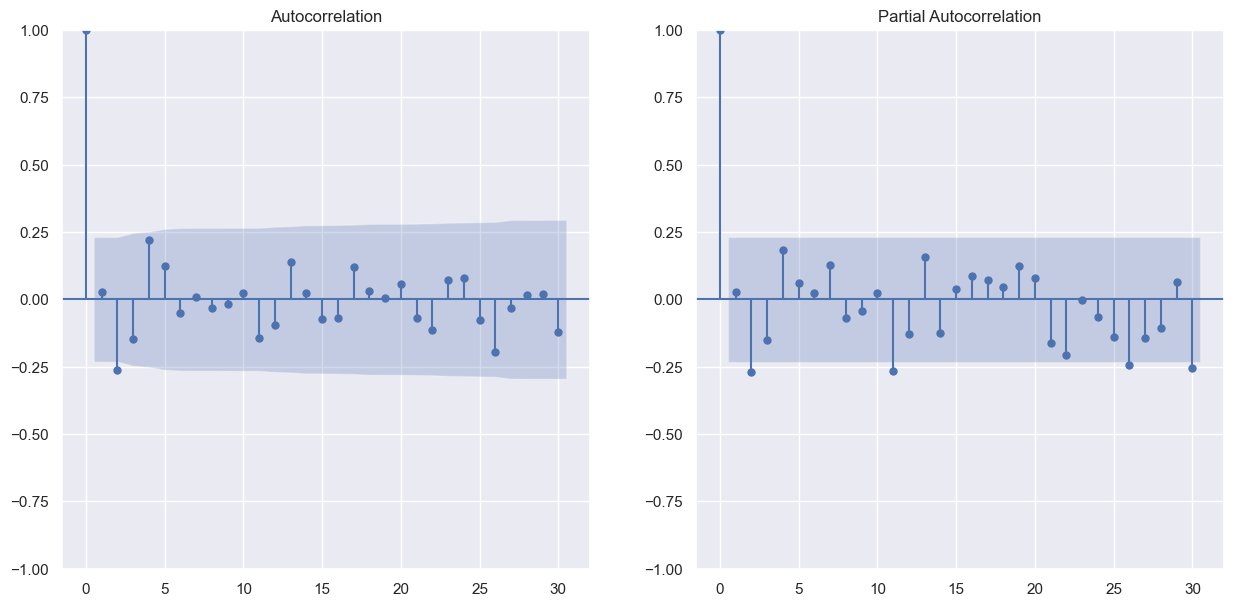

In [68]:
#Plotting ACF & PACF plots of whole data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(NER,lags=30,ax=ax[0])
plot_pacf(NER,lags=30,ax=ax[1])
plt.show()

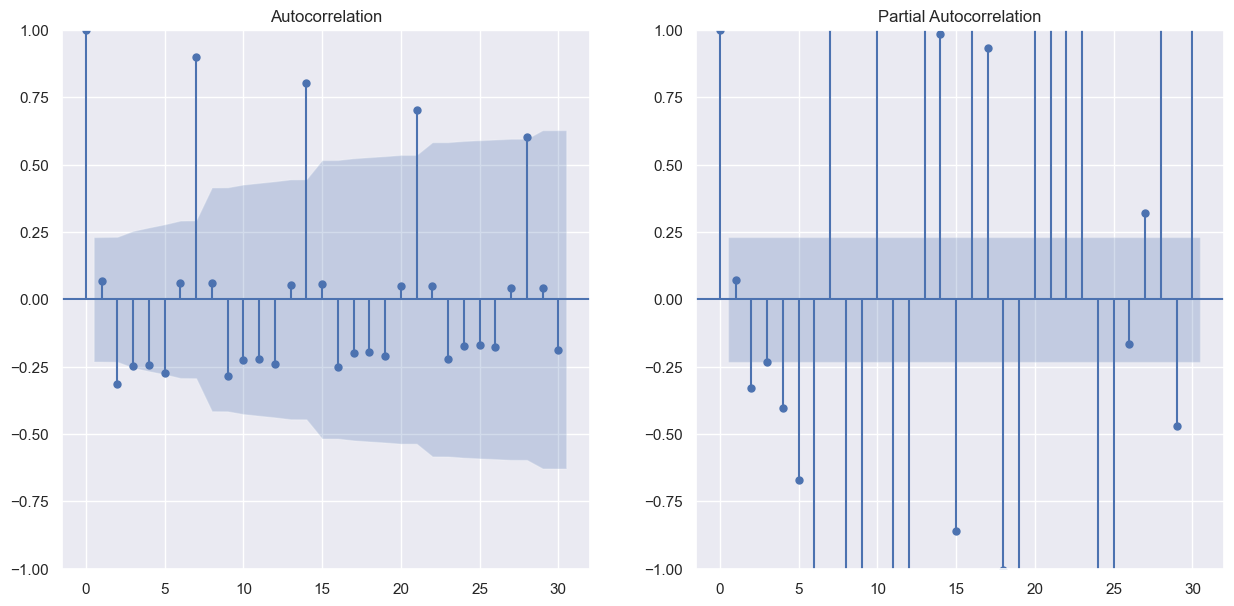

'Data is Stationary. Proceed to model building'

In [69]:
#Checking stationarity of seasonal compnent# Plotting ACF & PACF plots of seasonal component
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_p,lags=30,ax=ax[0])
plot_pacf(d_seasonal_p,lags=30,ax=ax[1])
plt.show()
checkStationarity(d_seasonal_p)

## Time Series Model Building

In [70]:
#Splitting the data into train and test by row indexing
ss = int(len(NER)*0.70)
train_pos = NER[:ss]
test_pos = NER[ss:]

### SARIMAX model

In [71]:
#As we have seasonality in our data so we are taking SARIMAX model
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
    for j in range(2):
        for k in range(5):
            for l in range(5):
                sarima_pos=SARIMAX(NER,order=(i,0,j),seasonal_order=(k,0,l,7),enforce_stationarity=False).fit()
                p.append(i)
                q.append(j)
                P.append(k)
                Q.append(l)
                aic.append(sarima_pos.aic)

In [72]:
#Checkin the best combination of p,d,q,P,D,Q based on AIC score
df1 = pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df1.sort_values(by='AIC',ascending=True).head() 

,p,q,P,Q,AIC
79,1,1,0,4,220.080480
84,1,1,1,4,222.018416
89,1,1,2,4,224.224558
94,1,1,3,4,224.948368
99,1,1,4,4,225.960592


### Model Prediction & Forecasting

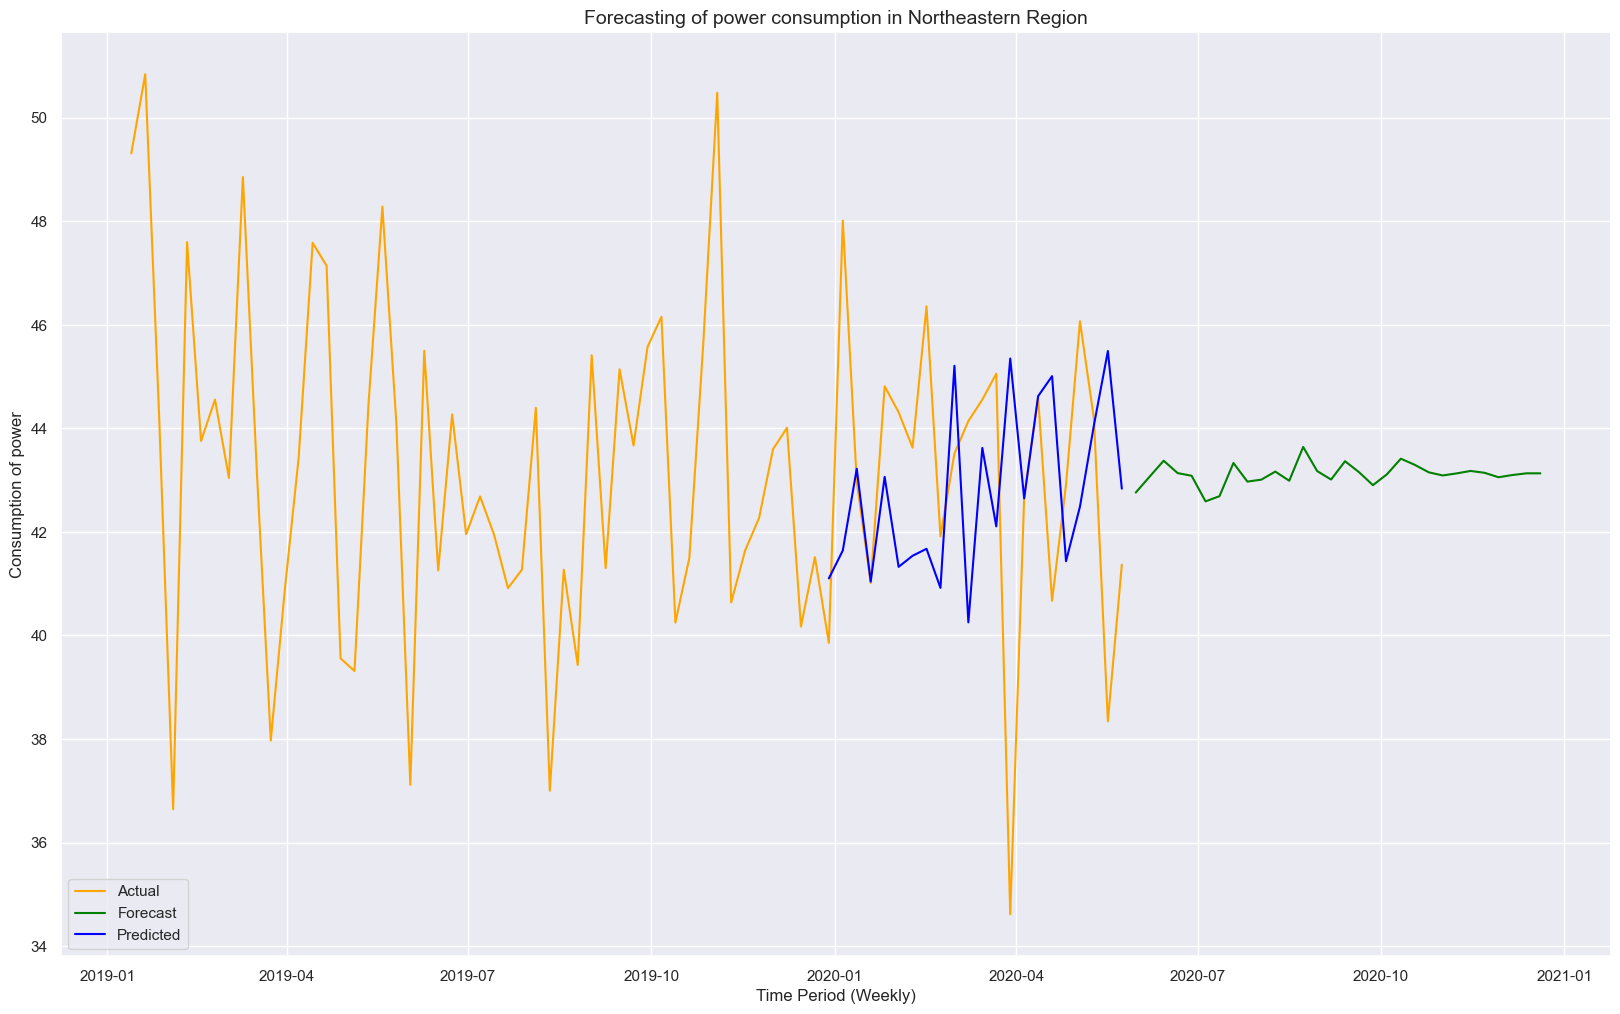

In [73]:
TSAplots(data=NER,train=train_pos,test=test_pos,p = 1,d = 0,q = 1,P = 0,Q = 4,D = 0,title="Forecasting of power consumption in Northeastern Region")

### Model Summary

In [74]:
#To chek if our model is stationary or not we are performing Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [75]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                          Northeastern Region   No. Observations:                   50
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2, 3, 4], 7)   Log Likelihood                -135.794
Date:                                      Mon, 05 Jun 2023   AIC                            285.588
Time:                                              16:41:45   BIC                            298.972
Sample:                                          01-13-2019   HQIC                           290.685
                                               - 12-22-2019                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   4313.790      0.000       1.000       1.000
ma.L1         -0.9335      0.046    -20.338      0.000      -1.023      -0.844
ma.S.L7       -0.1318      0.256     -0.516      0.606      -0.633       0.369
ma.S.L14      -0.0045      0.202     -0.022      0.982      -0.401       0.392
ma.S.L21       0.4106      0.302      1.357      0.175      -0.182       1.003
ma.S.L28       0.5924      0.246      2.413      0.016       0.111       1.074
sigma2         8.3622      0.044    190.282      0.000       8.276       8.448
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.66   Prob(JB):                         0.84
Heteroskedasticity (H):               0.53   Skew:                            -0.20
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+18. Standard errors may be unstable.
"""